本次实验选取了Wine Reviews和MLB Pitch Data 2015-2018中的两个数据集进行预处理。

# 环境准备
本实验使用了pandas和numpy库处理数据，借助matplotlib库进行可视化，同时在缺失值填充部分使用了scikit-learn库中的一些方法。

本实验程序代码仓库地址：[https://github.com/clock2125/DM-preprocess.git](https://github.com/clock2125/DM-preprocess.git)

In [1]:
# 导入本次实验要用到的python包
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.impute import SimpleImputer, KNNImputer

# Wine Reviews
## 读取数据并查看数据特征

In [2]:
df_data = pd.read_csv('data/winemag-data-130k-v2.csv') # 读取数据
print(df_data.head(5)) # 打印前五行
print('-----------------')
df_data = df_data.drop(['Unnamed: 0'], axis=1) # 把第一列序号列删去

   Unnamed: 0   country                                        description  \
0           0     Italy  Aromas include tropical fruit, broom, brimston...   
1           1  Portugal  This is ripe and fruity, a wine that is smooth...   
2           2        US  Tart and snappy, the flavors of lime flesh and...   
3           3        US  Pineapple rind, lemon pith and orange blossom ...   
4           4        US  Much like the regular bottling from 2012, this...   

                          designation  points  price           province  \
0                        Vulkà Bianco      87    NaN  Sicily & Sardinia   
1                            Avidagos      87   15.0              Douro   
2                                 NaN      87   14.0             Oregon   
3                Reserve Late Harvest      87   13.0           Michigan   
4  Vintner's Reserve Wild Child Block      87   65.0             Oregon   

              region_1           region_2         taster_name  \
0              

## 数据摘要
### 标称属性每个可能取值的频数

In [3]:
# df_numeric只包含数值属性
df_numeric = df_data.select_dtypes(exclude='O')
# df_noNumeric只包含标称属性
df_noNumeric = df_data.select_dtypes(include='O')

for label, content in df_noNumeric.items(): # 遍历所有column，统计频数
    print(content.value_counts())
    print('----------------------')

US                        54504
France                    22093
Italy                     19540
Spain                      6645
Portugal                   5691
Chile                      4472
Argentina                  3800
Austria                    3345
Australia                  2329
Germany                    2165
New Zealand                1419
South Africa               1401
Israel                      505
Greece                      466
Canada                      257
Hungary                     146
Bulgaria                    141
Romania                     120
Uruguay                     109
Turkey                       90
Slovenia                     87
Georgia                      86
England                      74
Croatia                      73
Mexico                       70
Moldova                      59
Brazil                       52
Lebanon                      35
Morocco                      28
Peru                         16
Ukraine                      14
Serbia  

Name: taster_twitter_handle, dtype: int64
----------------------
Gloria Ferrer NV Sonoma Brut Sparkling (Sonoma County)                         11
Korbel NV Brut Sparkling (California)                                           9
Segura Viudas NV Extra Dry Sparkling (Cava)                                     8
Ruinart NV Brut Rosé  (Champagne)                                               7
Segura Viudas NV Aria Estate Extra Dry Sparkling (Cava)                         7
                                                                               ..
Cave de Tain 2009 Gambert de Loche  (Hermitage)                                 1
Les Vins de Vienne 2009 Les Barcillants  (Cornas)                               1
Jean-Luc Colombo 2009 La Louvée  (Cornas)                                       1
Jean-Luc Baldès 2009 Clos Triguedina The New Black Wine Malbec (Cahors)         1
Domaine Schoffit 2012 Lieu-dit Harth Cuvée Caroline Gewurztraminer (Alsace)     1
Name: title, Length: 118840, dtyp

### 数值属性的五数概括以及缺失值个数

In [4]:
print(df_numeric.describe()) # 给出数值属性的描述
print('---------------------')
print(df_numeric.isnull().sum()) # 计算出缺失值的个数
print('------------------------')

              points          price
count  129971.000000  120975.000000
mean       88.447138      35.363389
std         3.039730      41.022218
min        80.000000       4.000000
25%        86.000000      17.000000
50%        88.000000      25.000000
75%        91.000000      42.000000
max       100.000000    3300.000000
---------------------
points       0
price     8996
dtype: int64
------------------------


可以看到points属性没有缺失值，price属性由8996个缺失值。

## 数据可视化
### 标称属性的频率直方图
这里以country,region_2两个属性为例绘制它们的频率直方图。

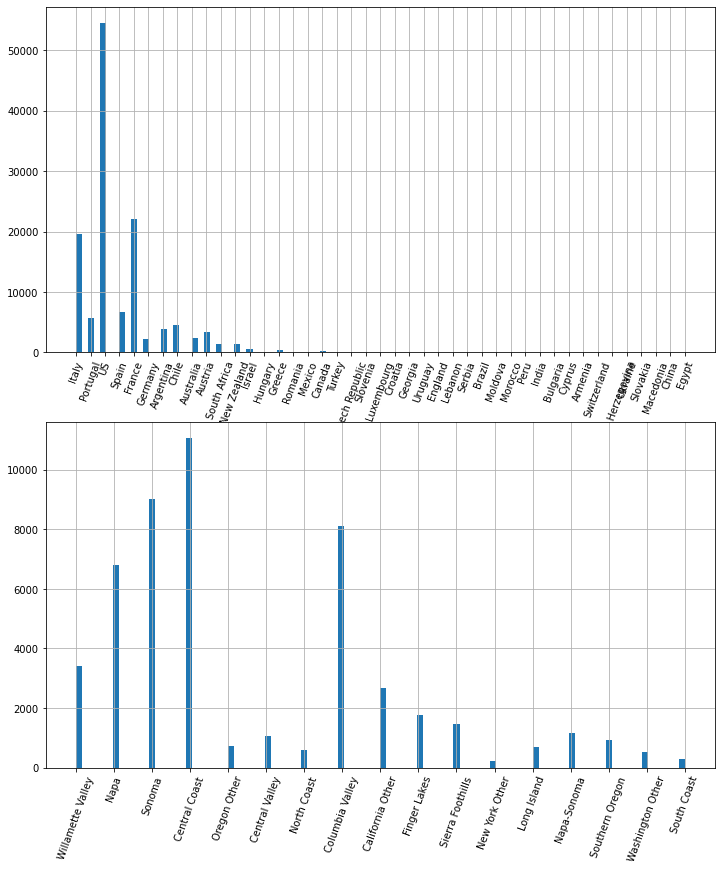

In [5]:
fig, nonum_his_axs = plt.subplots(2, 1, figsize=(12, 14))
df_noNumeric['country'].hist(xrot=70, ax=nonum_his_axs[0], bins=100)
df_noNumeric['region_2'].hist(xrot=70, ax=nonum_his_axs[1], bins=100)
plt.show()

### 数值属性的盒图、直方图

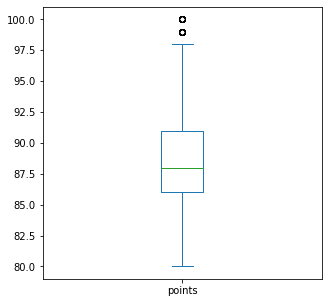

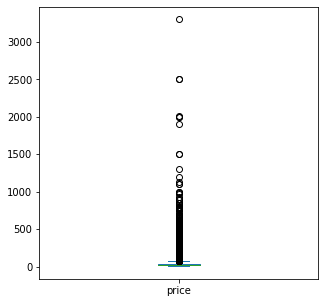

In [6]:
for label, content in df_numeric.items(): # 为每个属性绘制盒图
    df_numeric.plot.box(column=label, figsize=(5,5))

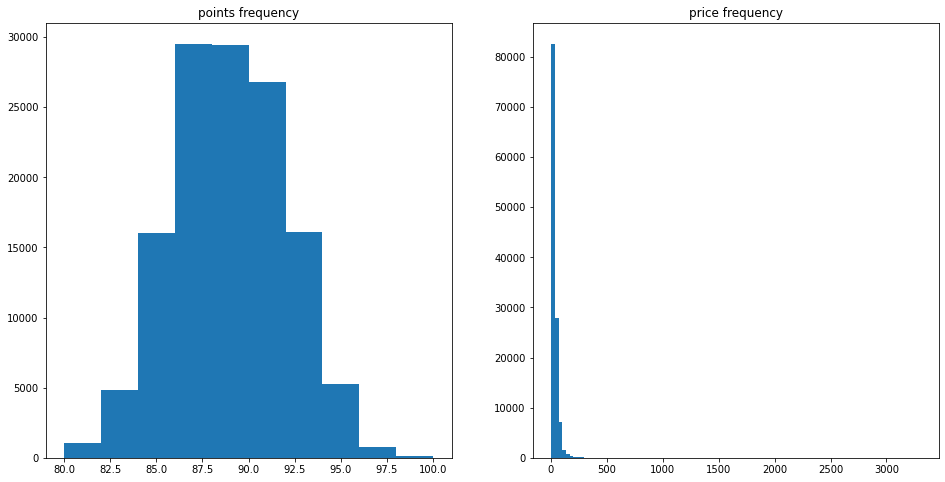

In [7]:
fig, num_hist_axs = plt.subplots(1,2,figsize=(16,8))
num_hist_axs[0].hist(df_numeric['points'], bins=10)
num_hist_axs[0].set_title('points frequency')
num_hist_axs[1].hist(df_numeric['price'], bins=100)
num_hist_axs[1].set_title('price frequency')
plt.show()

## 数据缺失的处理
### 方法一：将缺失部分剔除

In [8]:
df_numeric_nona1 = df_numeric.dropna(axis=0) # 直接删除带有缺失值的行

----------old dataset-----------
              points          price
count  129971.000000  120975.000000
mean       88.447138      35.363389
std         3.039730      41.022218
min        80.000000       4.000000
25%        86.000000      17.000000
50%        88.000000      25.000000
75%        91.000000      42.000000
max       100.000000    3300.000000
----------new dataset-----------
              points          price
count  120975.000000  120975.000000
mean       88.421881      35.363389
std         3.044508      41.022218
min        80.000000       4.000000
25%        86.000000      17.000000
50%        88.000000      25.000000
75%        91.000000      42.000000
max       100.000000    3300.000000
------------old dataset------------
points       0
price     8996
dtype: int64
------------new dataset------------
points    0
price     0
dtype: int64


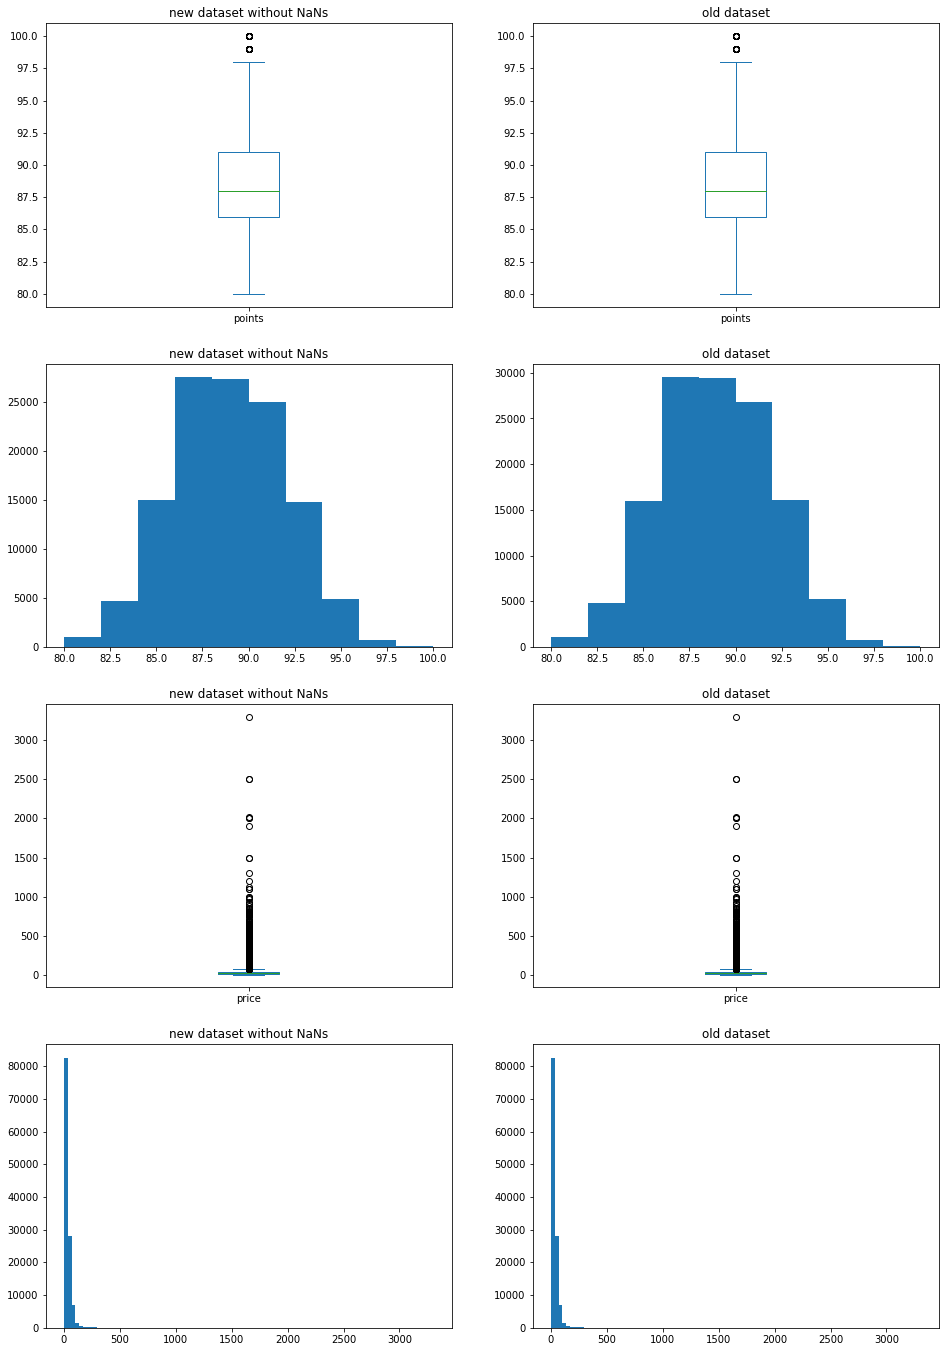

In [9]:
# 新旧数据集对比
fig, axs = plt.subplots(4,2,figsize=(16,24))
row = 0
col = 0
bins = 10
for label, content in df_numeric_nona1.items(): # 可视化对比处理前后的数据集
    axs[row, col].set_title('new dataset without NaNs')
    df_numeric_nona1.plot.box(column=label, ax=axs[row, col])
    col += 1
    if col == 2:
        row += 1
        col = 0
    axs[row, col].set_title('old dataset')
    df_numeric.plot.box(column=label, ax=axs[row, col])
    col += 1
    if col == 2:
        row += 1
        col = 0
    axs[row, col].set_title('new dataset without NaNs')
    if label == 'points':
        bins = 10
    else:
        bins = 100
    axs[row, col].hist(content, bins=bins)
    col += 1
    if col == 2:
        row += 1
        col = 0
    axs[row, col].set_title('old dataset')
    axs[row, col].hist(df_numeric[label], bins=bins)
    col += 1
    if col == 2:
        row += 1
        col = 0

print('----------old dataset-----------')
print(df_numeric.describe()) # 旧数据集数值属性的描述
print('----------new dataset-----------')
print(df_numeric_nona1.describe()) # 新数据集数值属性的描述

print('------------old dataset------------')
print(df_numeric.isnull().sum()) # 旧数据集缺失值的个数
print('------------new dataset------------')
print(df_numeric_nona1.isnull().sum()) # 新数据集缺失值的个数

### 方法二：用最高频率值来填补缺失值

In [10]:
# 使用最高频率值来填补缺失值
simpleImp = SimpleImputer(strategy="most_frequent") # 初始化sklearn的SimpleImputer对象
data_columns = df_numeric.columns
df_numeric_nona2 = pd.DataFrame(simpleImp.fit_transform(df_numeric)) # 用最高频率值来填补缺失值
df_numeric_nona2.columns = data_columns

----------old dataset-----------
              points          price
count  129971.000000  120975.000000
mean       88.447138      35.363389
std         3.039730      41.022218
min        80.000000       4.000000
25%        86.000000      17.000000
50%        88.000000      25.000000
75%        91.000000      42.000000
max       100.000000    3300.000000
----------new dataset-----------
              points          price
count  129971.000000  129971.000000
mean       88.447138      34.300005
std         3.039730      39.768715
min        80.000000       4.000000
25%        86.000000      18.000000
50%        88.000000      25.000000
75%        91.000000      40.000000
max       100.000000    3300.000000
------------old dataset------------
points       0
price     8996
dtype: int64
------------new dataset------------
points    0
price     0
dtype: int64


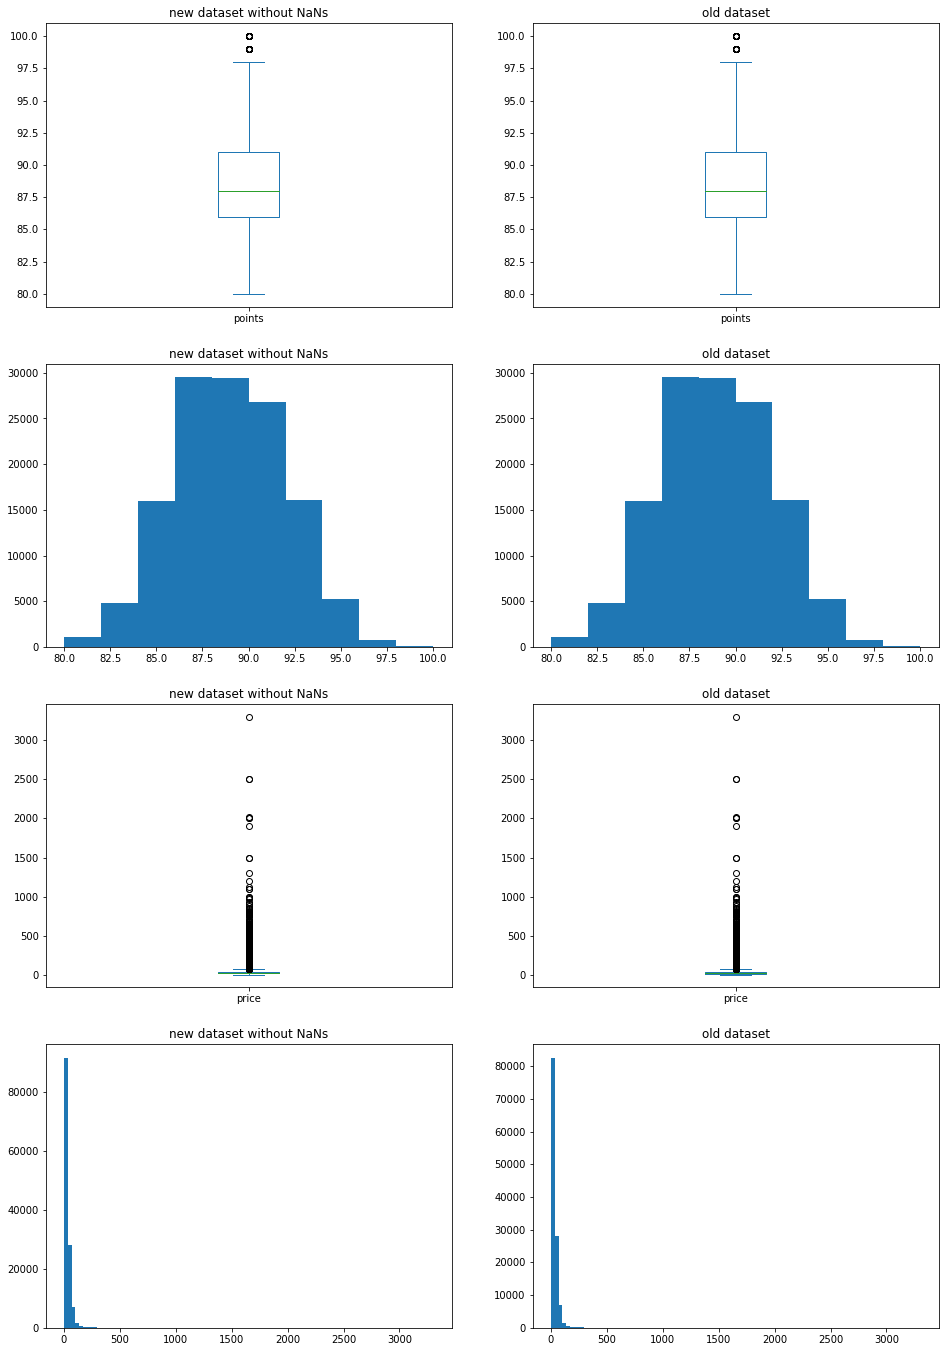

In [11]:
# 新旧数据集对比
fig, axs = plt.subplots(4,2,figsize=(16,24))
row = 0
col = 0
bins = 10
for label, content in df_numeric_nona2.items(): # 可视化对比处理前后的数据集
    axs[row, col].set_title('new dataset without NaNs')
    df_numeric_nona2.plot.box(column=label, ax=axs[row, col])
    col += 1
    if col == 2:
        row += 1
        col = 0
    axs[row, col].set_title('old dataset')
    df_numeric.plot.box(column=label, ax=axs[row, col])
    col += 1
    if col == 2:
        row += 1
        col = 0
    axs[row, col].set_title('new dataset without NaNs')
    if label == 'points':
        bins = 10
    else:
        bins = 100
    axs[row, col].hist(content, bins=bins)
    col += 1
    if col == 2:
        row += 1
        col = 0
    axs[row, col].set_title('old dataset')
    axs[row, col].hist(df_numeric[label], bins=bins)
    col += 1
    if col == 2:
        row += 1
        col = 0

print('----------old dataset-----------')
print(df_numeric.describe()) # 旧数据集数值属性的描述
print('----------new dataset-----------')
print(df_numeric_nona2.describe()) # 新数据集数值属性的描述

print('------------old dataset------------')
print(df_numeric.isnull().sum()) # 旧数据集缺失值的个数
print('------------new dataset------------')
print(df_numeric_nona2.isnull().sum()) # 新数据集缺失值的个数

### 方法三：通过属性的相关关系来填补缺失值
首先计算两两属性之间的pearson相关性系数：
$$
\rho_{X,Y} = \frac{Cov(X,Y)}{\sigma_X \sigma_Y}
$$
对于任意一个属性A，找到与之相关性系数最高的属性B，于是属性A的缺失值可按如下规则填充：

缺失的属性A值 = 该记录的属性B值*(属性A的平均值/属性B的平均值)

代码如下：

In [12]:
# 通过属性的相关关系来填补缺失值
df_numeric_nona3 = df_numeric.copy()
df_corr = df_numeric.corr(method='pearson') # 计算属性之间的相关性矩阵
means = df_numeric.mean(axis=0) # 计算各属性的平均值
for label1 in df_numeric.columns:
    max_corr = 0
    relate_column = label1
    for label2 in df_numeric.columns: # 找到与label1相关性最高的属性
        if label1 == label2:
            continue
        else:
            if df_corr.at[label1, label2] > max_corr:
                max_corr = df_corr.at[label1, label2]
                relate_column = label2
    if relate_column != label1: # 填补缺失值
        rate = means.at[label1]/means.at[relate_column]
        df_numeric_nona3[label1].fillna(df_numeric[relate_column].mul(rate), inplace=True)

----------old dataset-----------
              points          price
count  129971.000000  120975.000000
mean       88.447138      35.363389
std         3.039730      41.022218
min        80.000000       4.000000
25%        86.000000      17.000000
50%        88.000000      25.000000
75%        91.000000      42.000000
max       100.000000    3300.000000
----------new dataset-----------
              points          price
count  129971.000000  129971.000000
mean       88.447138      35.372789
std         3.039730      39.578301
min        80.000000       4.000000
25%        86.000000      18.000000
50%        88.000000      28.000000
75%        91.000000      40.000000
max       100.000000    3300.000000
------------old dataset------------
points       0
price     8996
dtype: int64
------------new dataset------------
points    0
price     0
dtype: int64


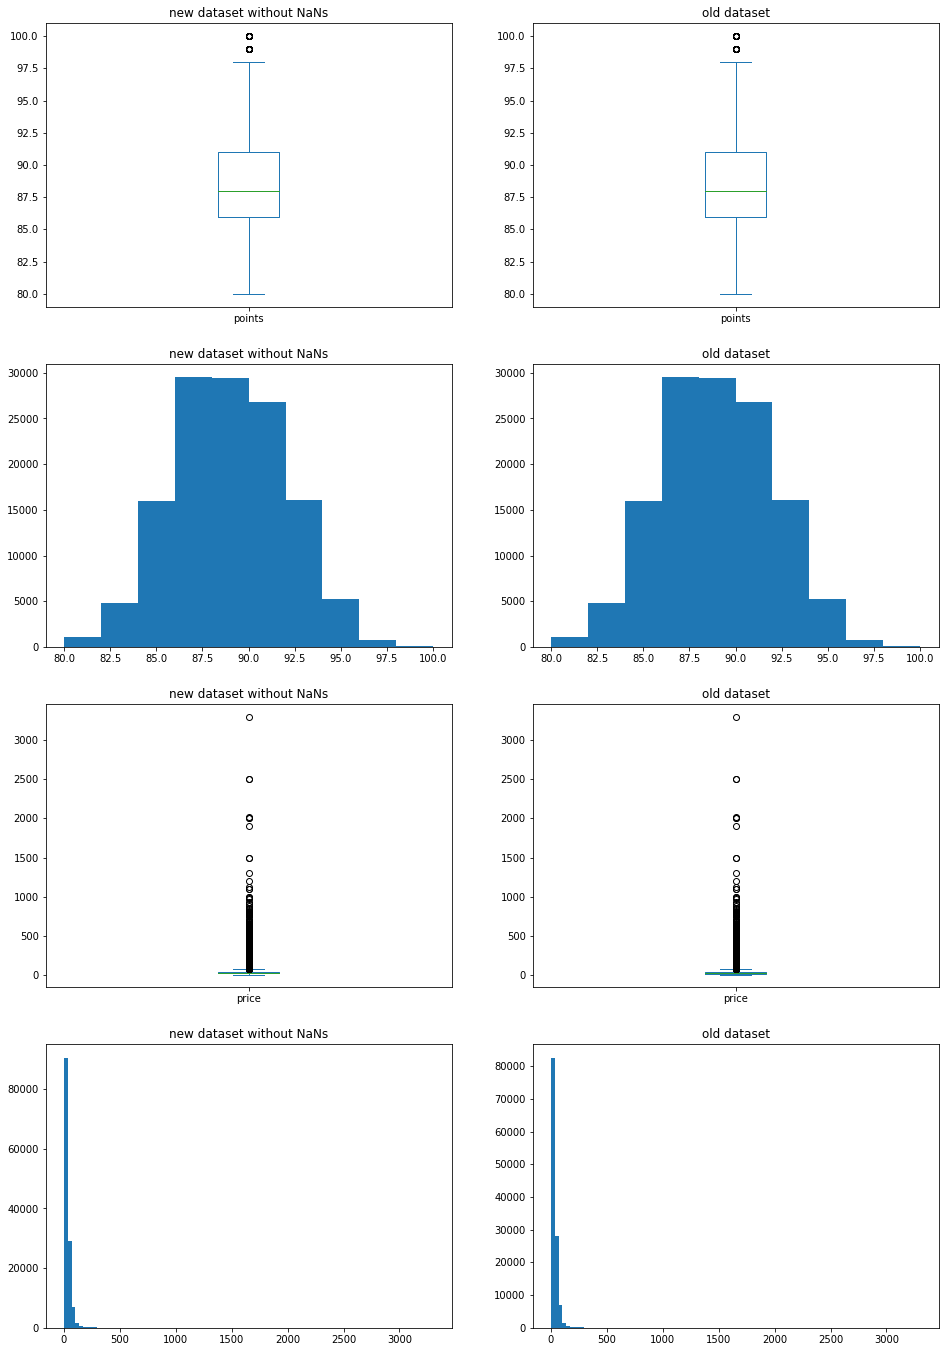

In [13]:
# 新旧数据集对比
fig, axs = plt.subplots(4,2,figsize=(16,24))
row = 0
col = 0
bins = 10
for label, content in df_numeric_nona3.items(): # 可视化对比处理前后的数据集
    axs[row, col].set_title('new dataset without NaNs')
    df_numeric_nona3.plot.box(column=label, ax=axs[row, col])
    col += 1
    if col == 2:
        row += 1
        col = 0
    axs[row, col].set_title('old dataset')
    df_numeric.plot.box(column=label, ax=axs[row, col])
    col += 1
    if col == 2:
        row += 1
        col = 0
    axs[row, col].set_title('new dataset without NaNs')
    if label == 'points':
        bins = 10
    else:
        bins = 100
    axs[row, col].hist(content, bins=bins)
    col += 1
    if col == 2:
        row += 1
        col = 0
    axs[row, col].set_title('old dataset')
    axs[row, col].hist(df_numeric[label], bins=bins)
    col += 1
    if col == 2:
        row += 1
        col = 0

print('----------old dataset-----------')
print(df_numeric.describe()) # 旧数据集数值属性的描述
print('----------new dataset-----------')
print(df_numeric_nona3.describe()) # 新数据集数值属性的描述

print('------------old dataset------------')
print(df_numeric.isnull().sum()) # 旧数据集缺失值的个数
print('------------new dataset------------')
print(df_numeric_nona3.isnull().sum()) # 新数据集缺失值的个数

### 方法四：通过数据对象之间的相似性来填补缺失值
本实验采用KNN的方式通过数据对象之间的相似性来填补缺失值，选取距离某个数据对象最近的10个对象，用它们的平均值来填补该对象的缺失值。代码如下

In [14]:
# 通过数据对象之间的相似性来填补缺失值
knnImp = KNNImputer(n_neighbors=10) # 初始化sklearn的KNNImputer对象
data_columns = df_numeric.columns
df_numeric_nona4 = pd.DataFrame(knnImp.fit_transform(df_numeric)) # 进行KNN插值
df_numeric_nona4.columns = data_columns

----------old dataset-----------
              points          price
count  129971.000000  120975.000000
mean       88.447138      35.363389
std         3.039730      41.022218
min        80.000000       4.000000
25%        86.000000      17.000000
50%        88.000000      25.000000
75%        91.000000      42.000000
max       100.000000    3300.000000
----------new dataset-----------
              points          price
count  129971.000000  129971.000000
mean       88.447138      35.599948
std         3.039730      40.055289
min        80.000000       4.000000
25%        86.000000      18.000000
50%        88.000000      25.900000
75%        91.000000      42.000000
max       100.000000    3300.000000
------------old dataset------------
points       0
price     8996
dtype: int64
------------new dataset------------
points    0
price     0
dtype: int64


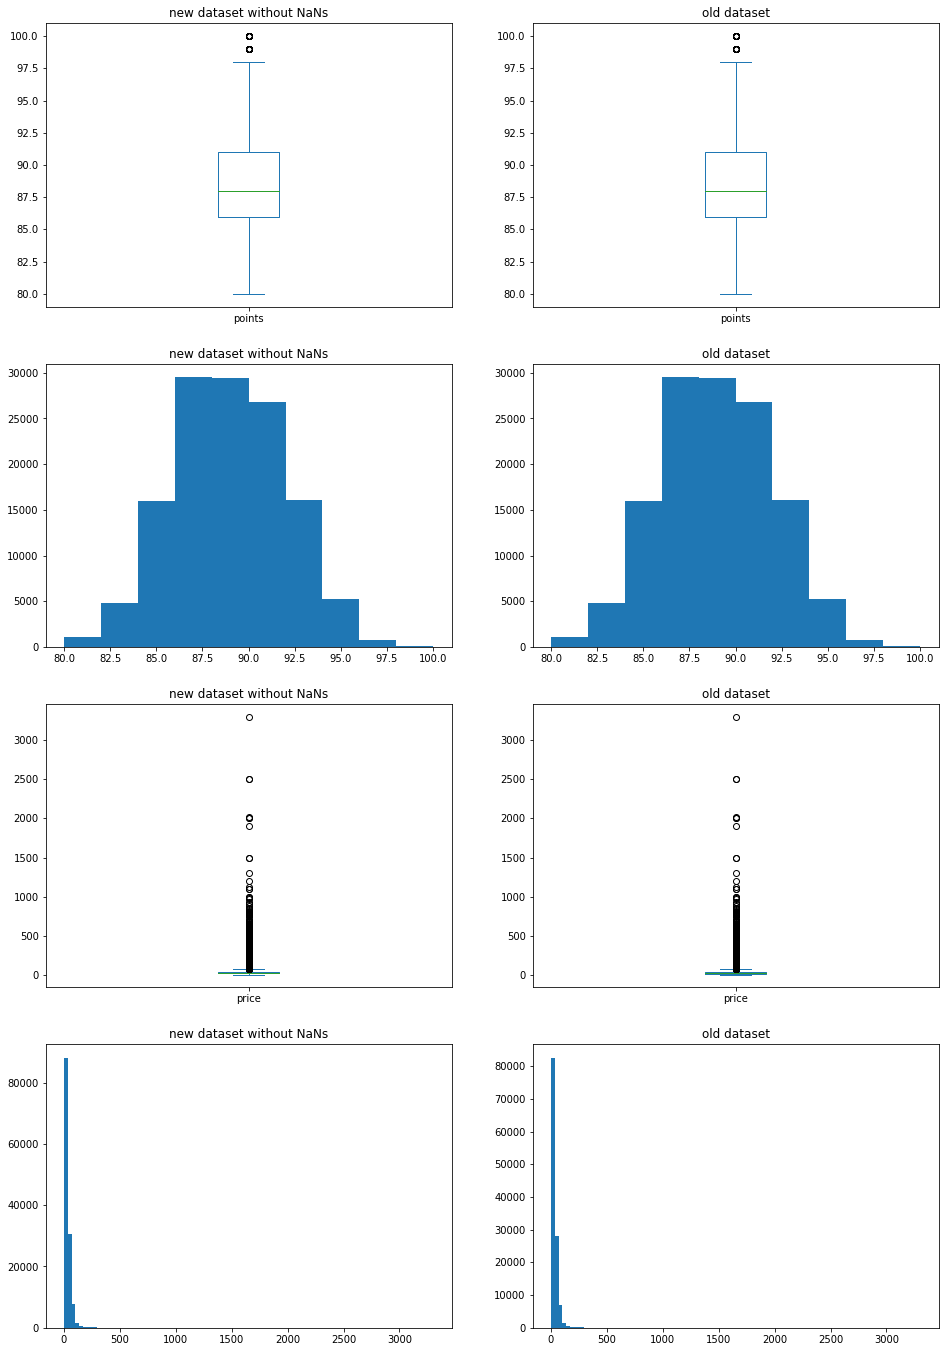

In [15]:
#新旧数据集对比
fig, axs = plt.subplots(4,2,figsize=(16,24))
row = 0
col = 0
bins = 10
for label, content in df_numeric_nona4.items(): # 可视化对比处理前后的数据集
    axs[row, col].set_title('new dataset without NaNs')
    df_numeric_nona4.plot.box(column=label, ax=axs[row, col])
    col += 1
    if col == 2:
        row += 1
        col = 0
    axs[row, col].set_title('old dataset')
    df_numeric.plot.box(column=label, ax=axs[row, col])
    col += 1
    if col == 2:
        row += 1
        col = 0
    axs[row, col].set_title('new dataset without NaNs')
    if label == 'points':
        bins = 10
    else:
        bins = 100
    axs[row, col].hist(content, bins=bins)
    col += 1
    if col == 2:
        row += 1
        col = 0
    axs[row, col].set_title('old dataset')
    axs[row, col].hist(df_numeric[label], bins=bins)
    col += 1
    if col == 2:
        row += 1
        col = 0

print('----------old dataset-----------')
print(df_numeric.describe()) # 旧数据集数值属性的描述
print('----------new dataset-----------')
print(df_numeric_nona4.describe()) # 新数据集数值属性的描述

print('------------old dataset------------')
print(df_numeric.isnull().sum()) # 旧数据集缺失值的个数
print('------------new dataset------------')
print(df_numeric_nona4.isnull().sum()) # 新数据集缺失值的个数

# MLB Pitch Data 2015-2018
## 读取数据并查看数据特征

In [16]:
df_data = pd.read_csv('data/pitches.csv')
print(df_data.head(5)) # 打印前五行
print('-----------------')

      px     pz  start_speed  end_speed  spin_rate  spin_dir  break_angle  \
0  0.416  2.963         92.9       84.1   2305.052   159.235        -25.0   
1 -0.191  2.347         92.8       84.1   2689.935   151.402        -40.7   
2 -0.518  3.284         94.1       85.2   2647.972   145.125        -43.7   
3 -0.641  1.221         91.0       84.0   1289.590   169.751         -1.3   
4 -1.821  2.083         75.4       69.6   1374.569   280.671         18.4   

   break_length  break_y      ax  ...  event_num  b_score         ab_id  \
0           3.2     23.7   7.665  ...          3      0.0  2.015000e+09   
1           3.4     23.7  12.043  ...          4      0.0  2.015000e+09   
2           3.7     23.7  14.368  ...          5      0.0  2.015000e+09   
3           5.0     23.8   2.104  ...          6      0.0  2.015000e+09   
4          12.0     23.8 -10.280  ...          7      0.0  2.015000e+09   

   b_count  s_count  outs  pitch_num  on_1b  on_2b  on_3b  
0      0.0      0.0   0.0 

## 数据摘要
### 标称属性每个可能取值的频数

In [17]:
# df_numeric只包含数值属性
df_numeric = df_data.select_dtypes(exclude='O')
# df_noNumeric只包含标称属性
df_noNumeric = df_data.select_dtypes(include='O')

for label, content in df_noNumeric.items(): # 遍历所有column，统计频数
    print(content.value_counts())
    print('----------------------')

B     956646
F     496512
C     480903
X     330875
S     271330
D     117123
*B     65675
E      64166
T      23947
W      23137
L       8471
H       6938
V       6652
I       6588
M       1844
P        619
Q          6
R          2
Z          1
Name: code, dtype: int64
----------------------
S    1308865
B    1045126
X     513163
Name: type, dtype: int64
----------------------
FF    1014877
SL     450578
FT     337983
CH     292789
SI     242504
CU     234391
FC     149756
KC      66484
FS      43705
KN      11260
IN       6197
EP        815
FO        810
PO        628
SC        113
UN         57
FA          9
AB          9
Name: pitch_type, dtype: int64
----------------------


### 数值属性的五数概括以及缺失值个数

In [18]:
print(df_numeric.describe()) # 给出数值属性的描述
print('---------------------')
print(df_numeric.isnull().sum()) # 计算出缺失值的个数
print('------------------------')

                 px            pz   start_speed     end_speed     spin_rate  \
count  2.852965e+06  2.852965e+06  2.853040e+06  2.853040e+06  2.852965e+06   
mean   6.572502e-03  2.254962e+00  8.838124e+01  8.136274e+01  1.731173e+03   
std    8.927490e-01  9.463968e-01  6.015540e+00  5.364057e+00  6.827521e+02   
min   -1.054333e+01 -5.183664e+00  3.390000e+01  3.240000e+01  1.214000e+00   
25%   -5.908243e-01  1.650000e+00  8.430000e+01  7.790000e+01  1.238745e+03   
50%    1.300000e-02  2.259000e+00  8.970000e+01  8.250000e+01  1.866322e+03   
75%    6.090000e-01  2.863000e+00  9.300000e+01  8.540000e+01  2.247564e+03   
max    1.295291e+01  1.488624e+01  1.050000e+02  9.690000e+01  6.539259e+03   

           spin_dir   break_angle  break_length       break_y            ax  \
count  2.852965e+06  2.852965e+06  2.852965e+06  2.852965e+06  2.852965e+06   
mean   1.802308e+02  5.848084e+00  6.601459e+00  2.381685e+01 -2.308512e+00   
std    6.742859e+01  2.443621e+01  1.331708e+02  6.

## 数据可视化
### 标称属性的频率直方图

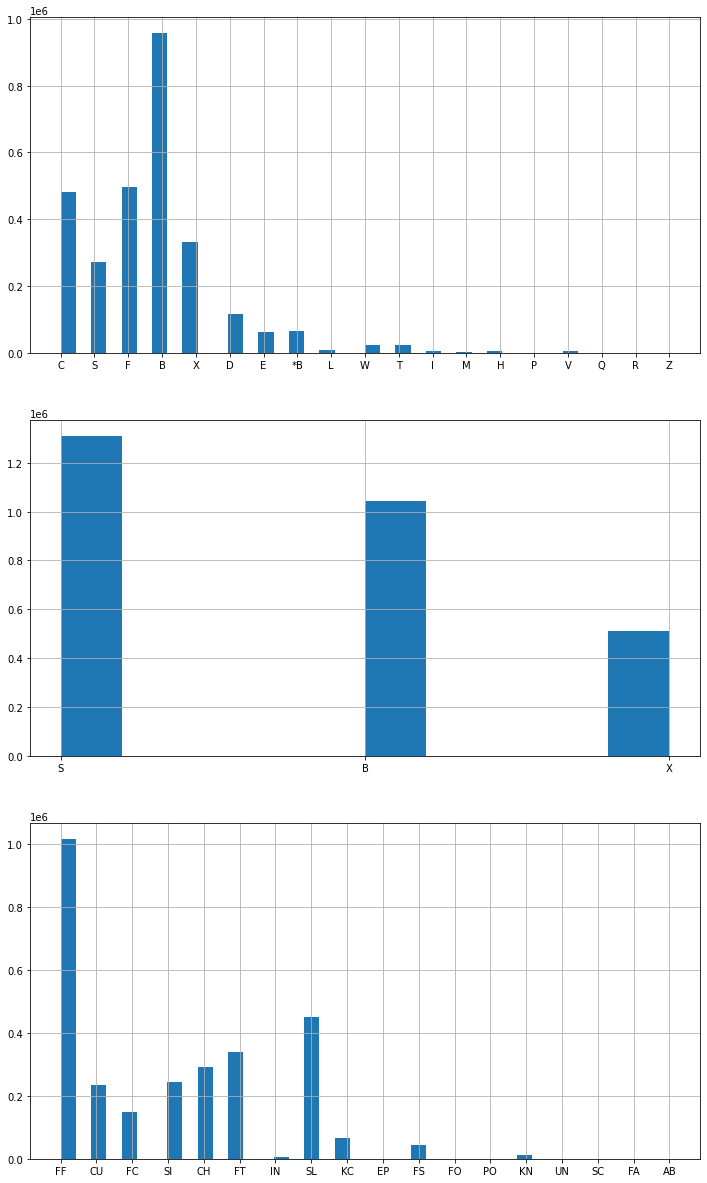

In [19]:
fig, nonum_his_axs = plt.subplots(3, 1, figsize=(12, 21))
df_noNumeric['code'].hist(ax=nonum_his_axs[0], bins=40)
df_noNumeric['type'].hist(ax=nonum_his_axs[1], bins=10)
df_noNumeric['pitch_type'].hist(ax=nonum_his_axs[2], bins=40)
plt.show()

### 数值属性的盒图、直方图

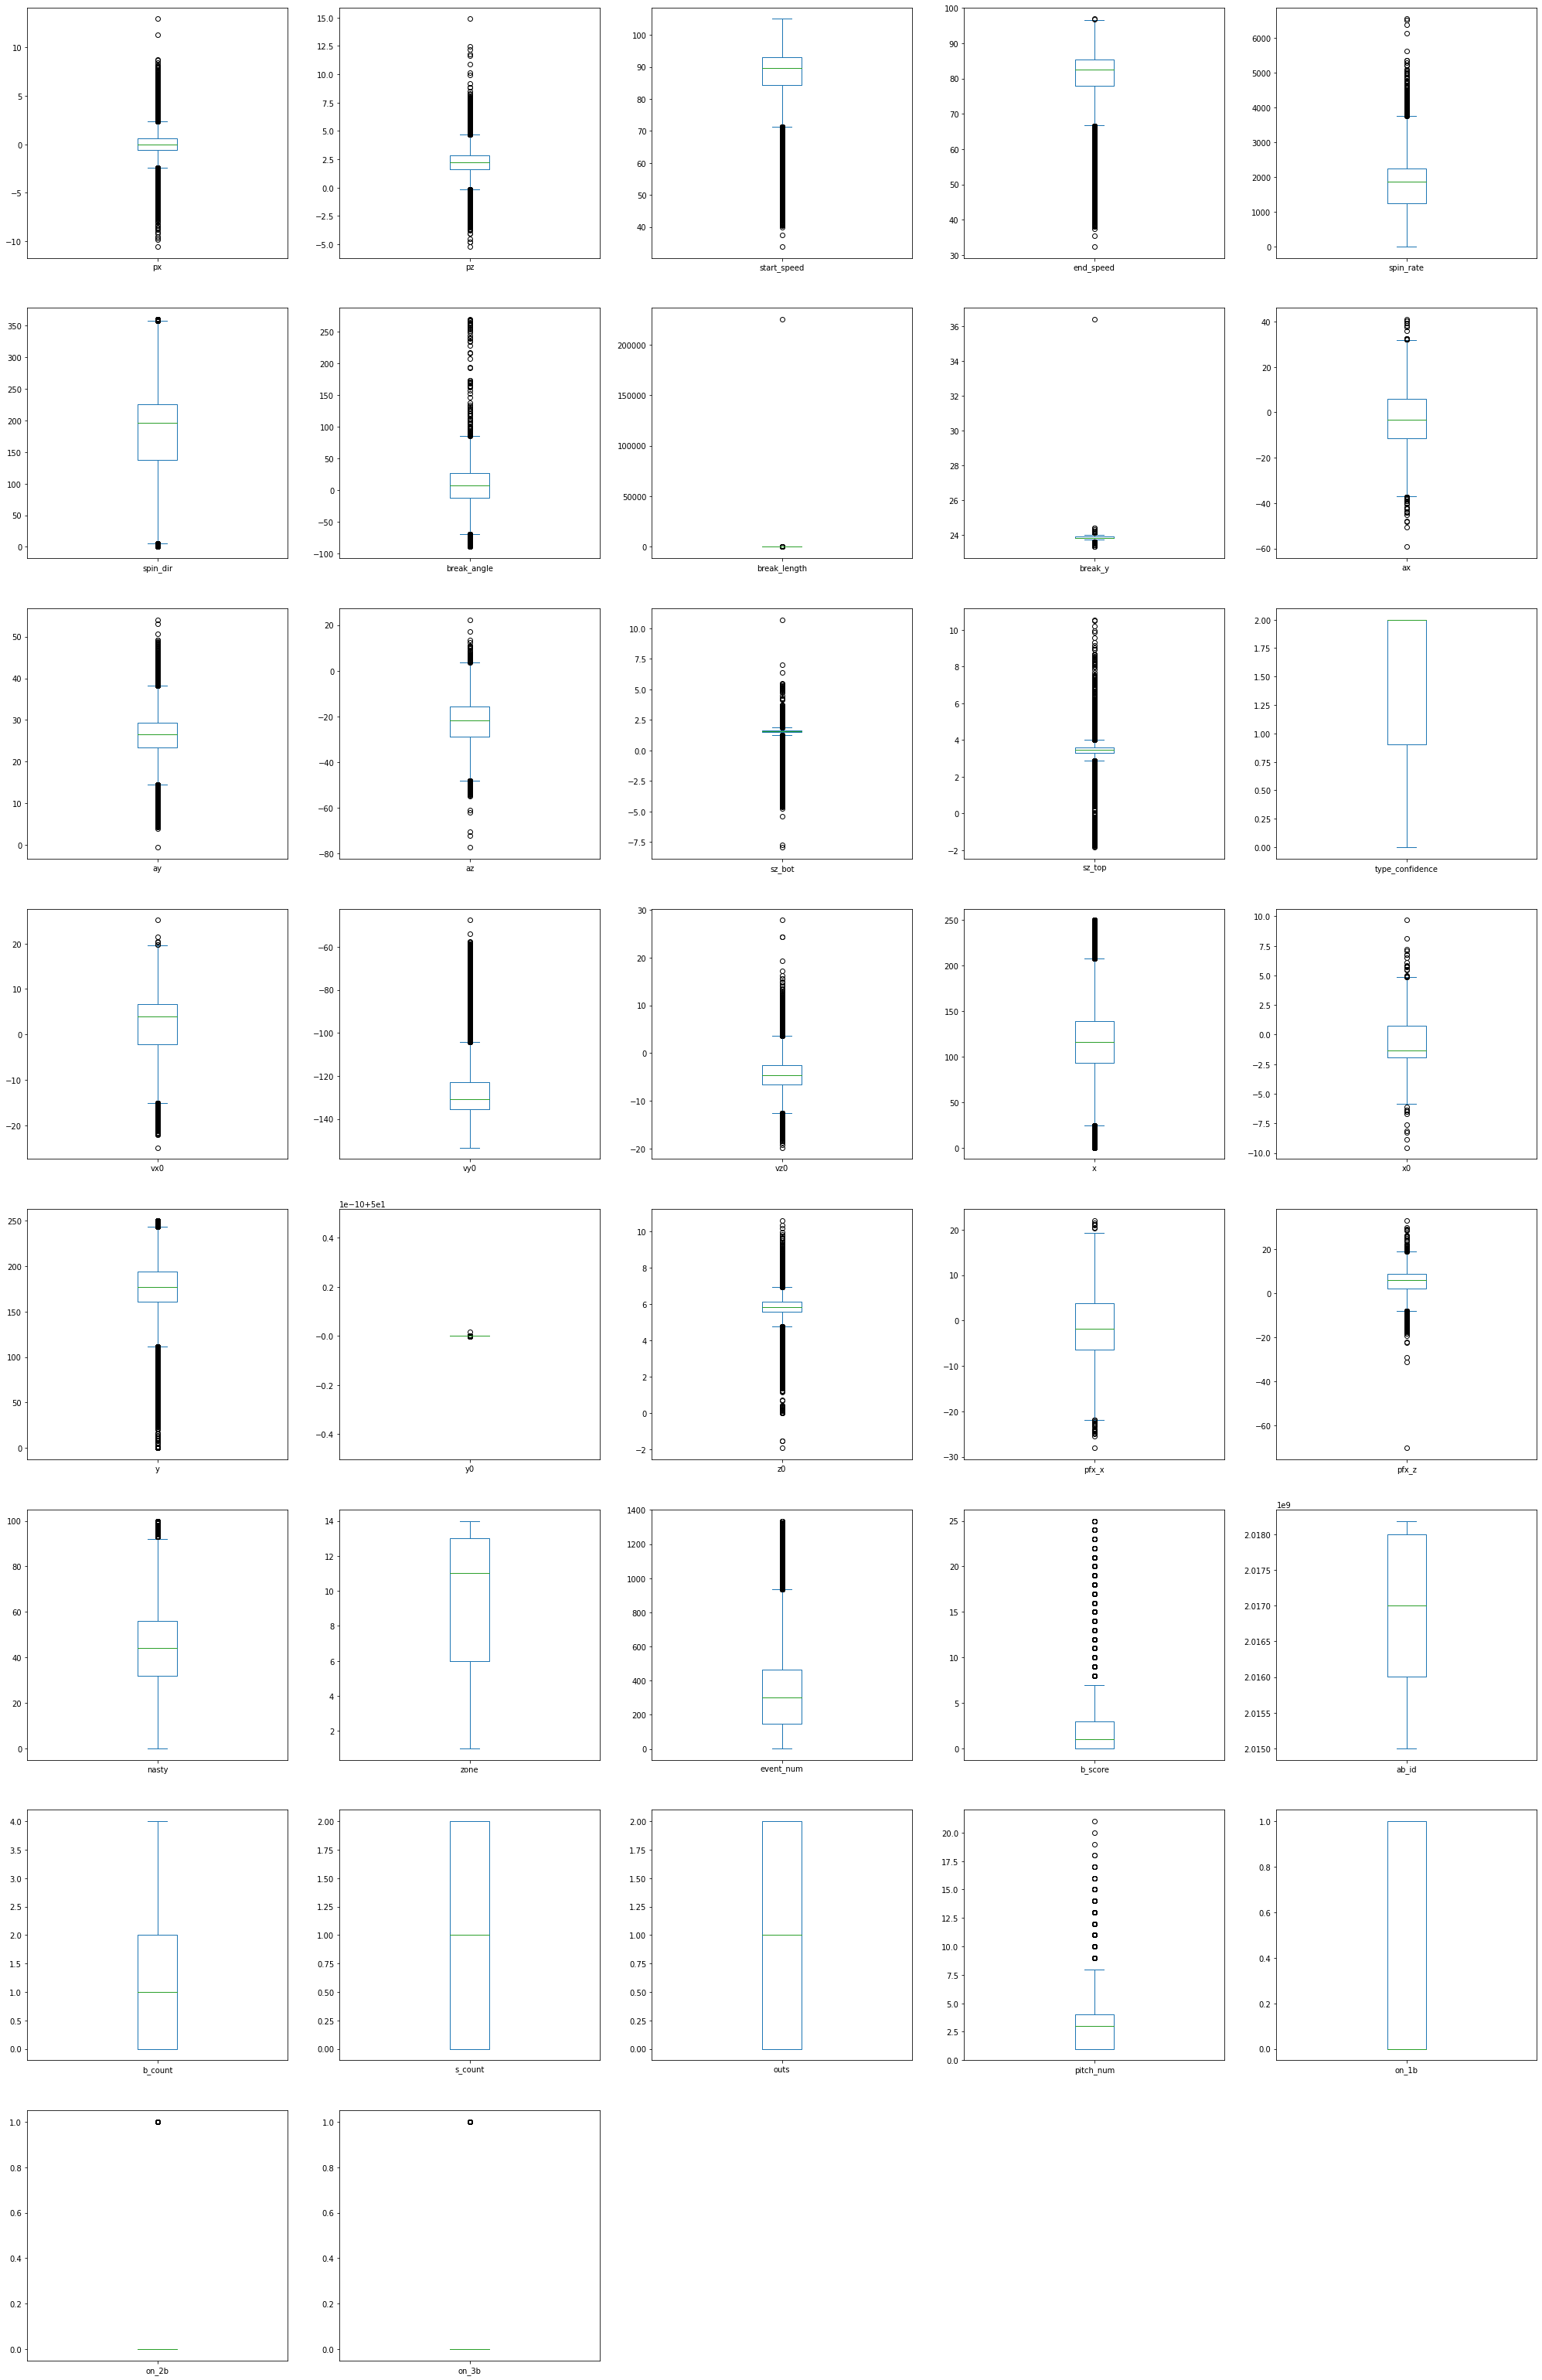

In [21]:
fig, axs = plt.subplots(8, 5, figsize=(35, 56))
row = 0
col = 0
for label in df_numeric.columns: # 为每个属性绘制盒图
    df_numeric.plot.box(column=label, ax=axs[row, col])
    col += 1
    if col == 5:
        col = 0
        row += 1
axs[7,4].remove()
axs[7,3].remove()
axs[7,2].remove()

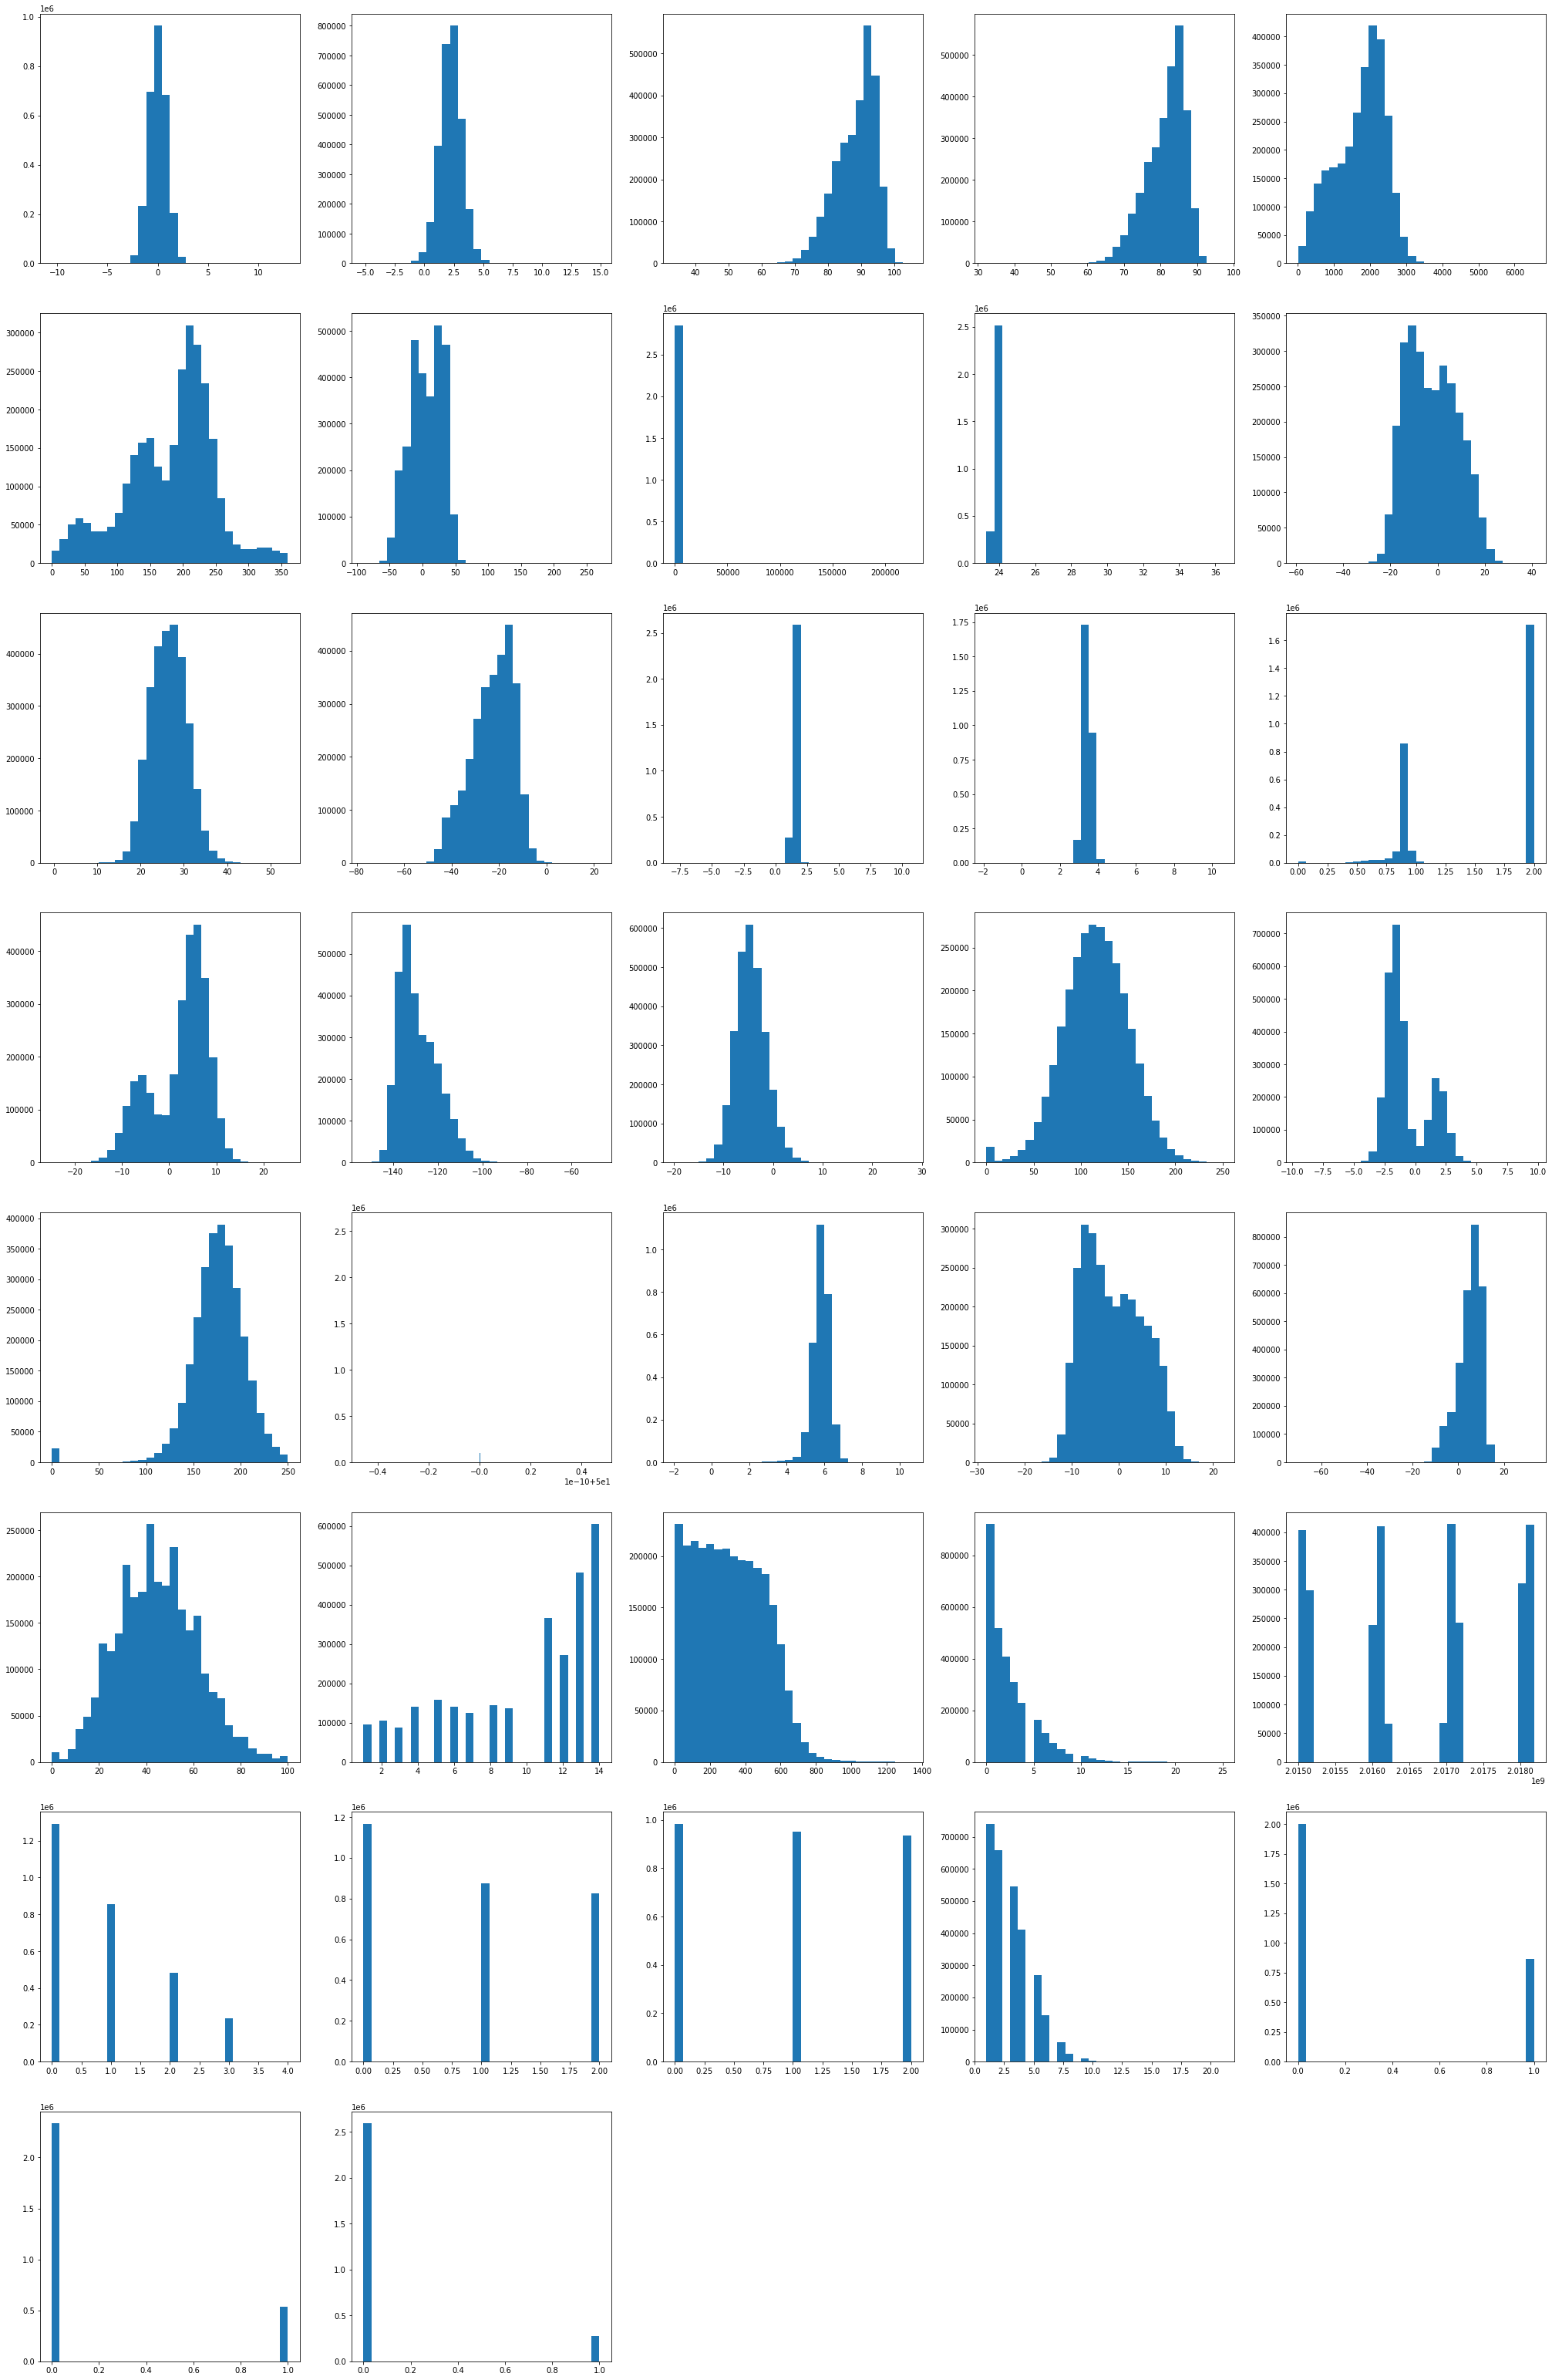

In [22]:
fig, axs = plt.subplots(8, 5, figsize=(35, 56))
row = 0
col = 0
for label in df_numeric.columns: # 为每个属性绘制直方图
    axs[row, col].hist(df_numeric[label], bins=30)
    col += 1
    if col == 5:
        col = 0
        row += 1
axs[7,4].remove()
axs[7,3].remove()
axs[7,2].remove()
plt.show()

## 数据缺失的处理
### 方法一：将缺失部分剔除

In [23]:
df_numeric_nona1 = df_numeric.dropna(axis=0) # 直接删除带有缺失值的行

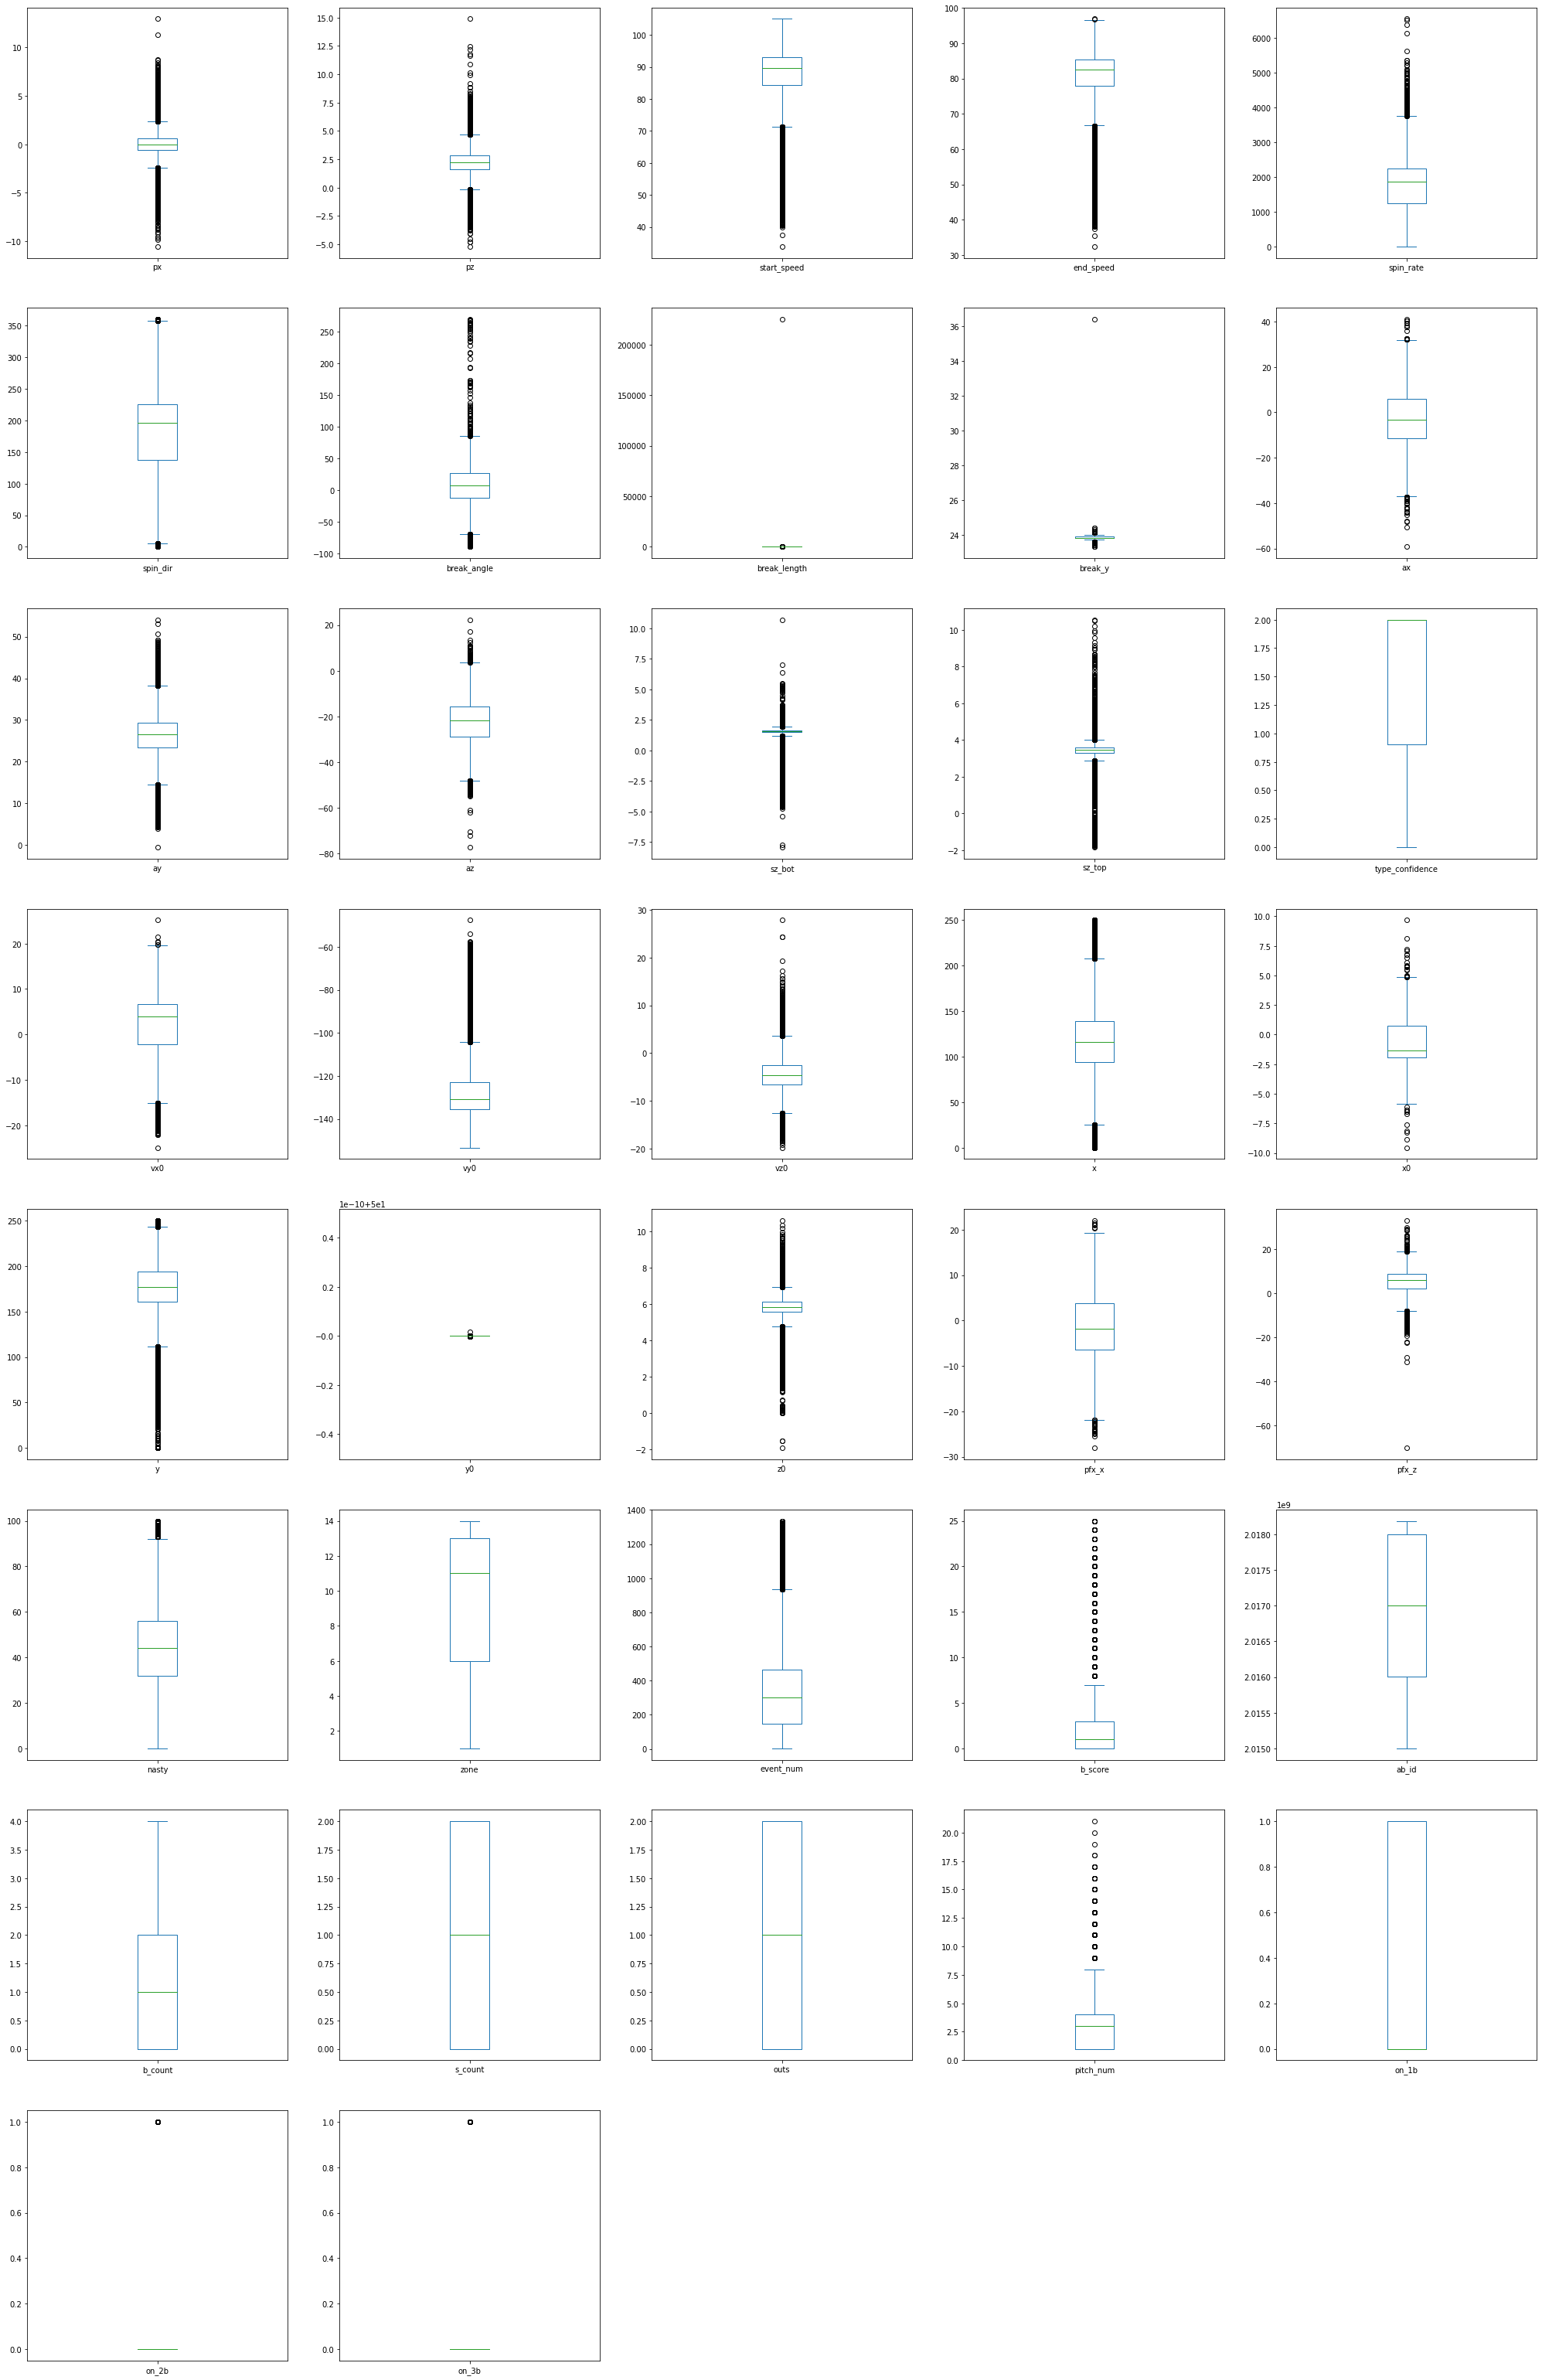

In [25]:
# 新数据集各个属性的盒图
fig, axs = plt.subplots(8, 5, figsize=(35, 56))
row = 0
col = 0
for label in df_numeric_nona1.columns: # 为每个属性绘制盒图
    df_numeric_nona1.plot.box(column=label, ax=axs[row, col])
    col += 1
    if col == 5:
        col = 0
        row += 1
axs[7,4].remove()
axs[7,3].remove()
axs[7,2].remove()


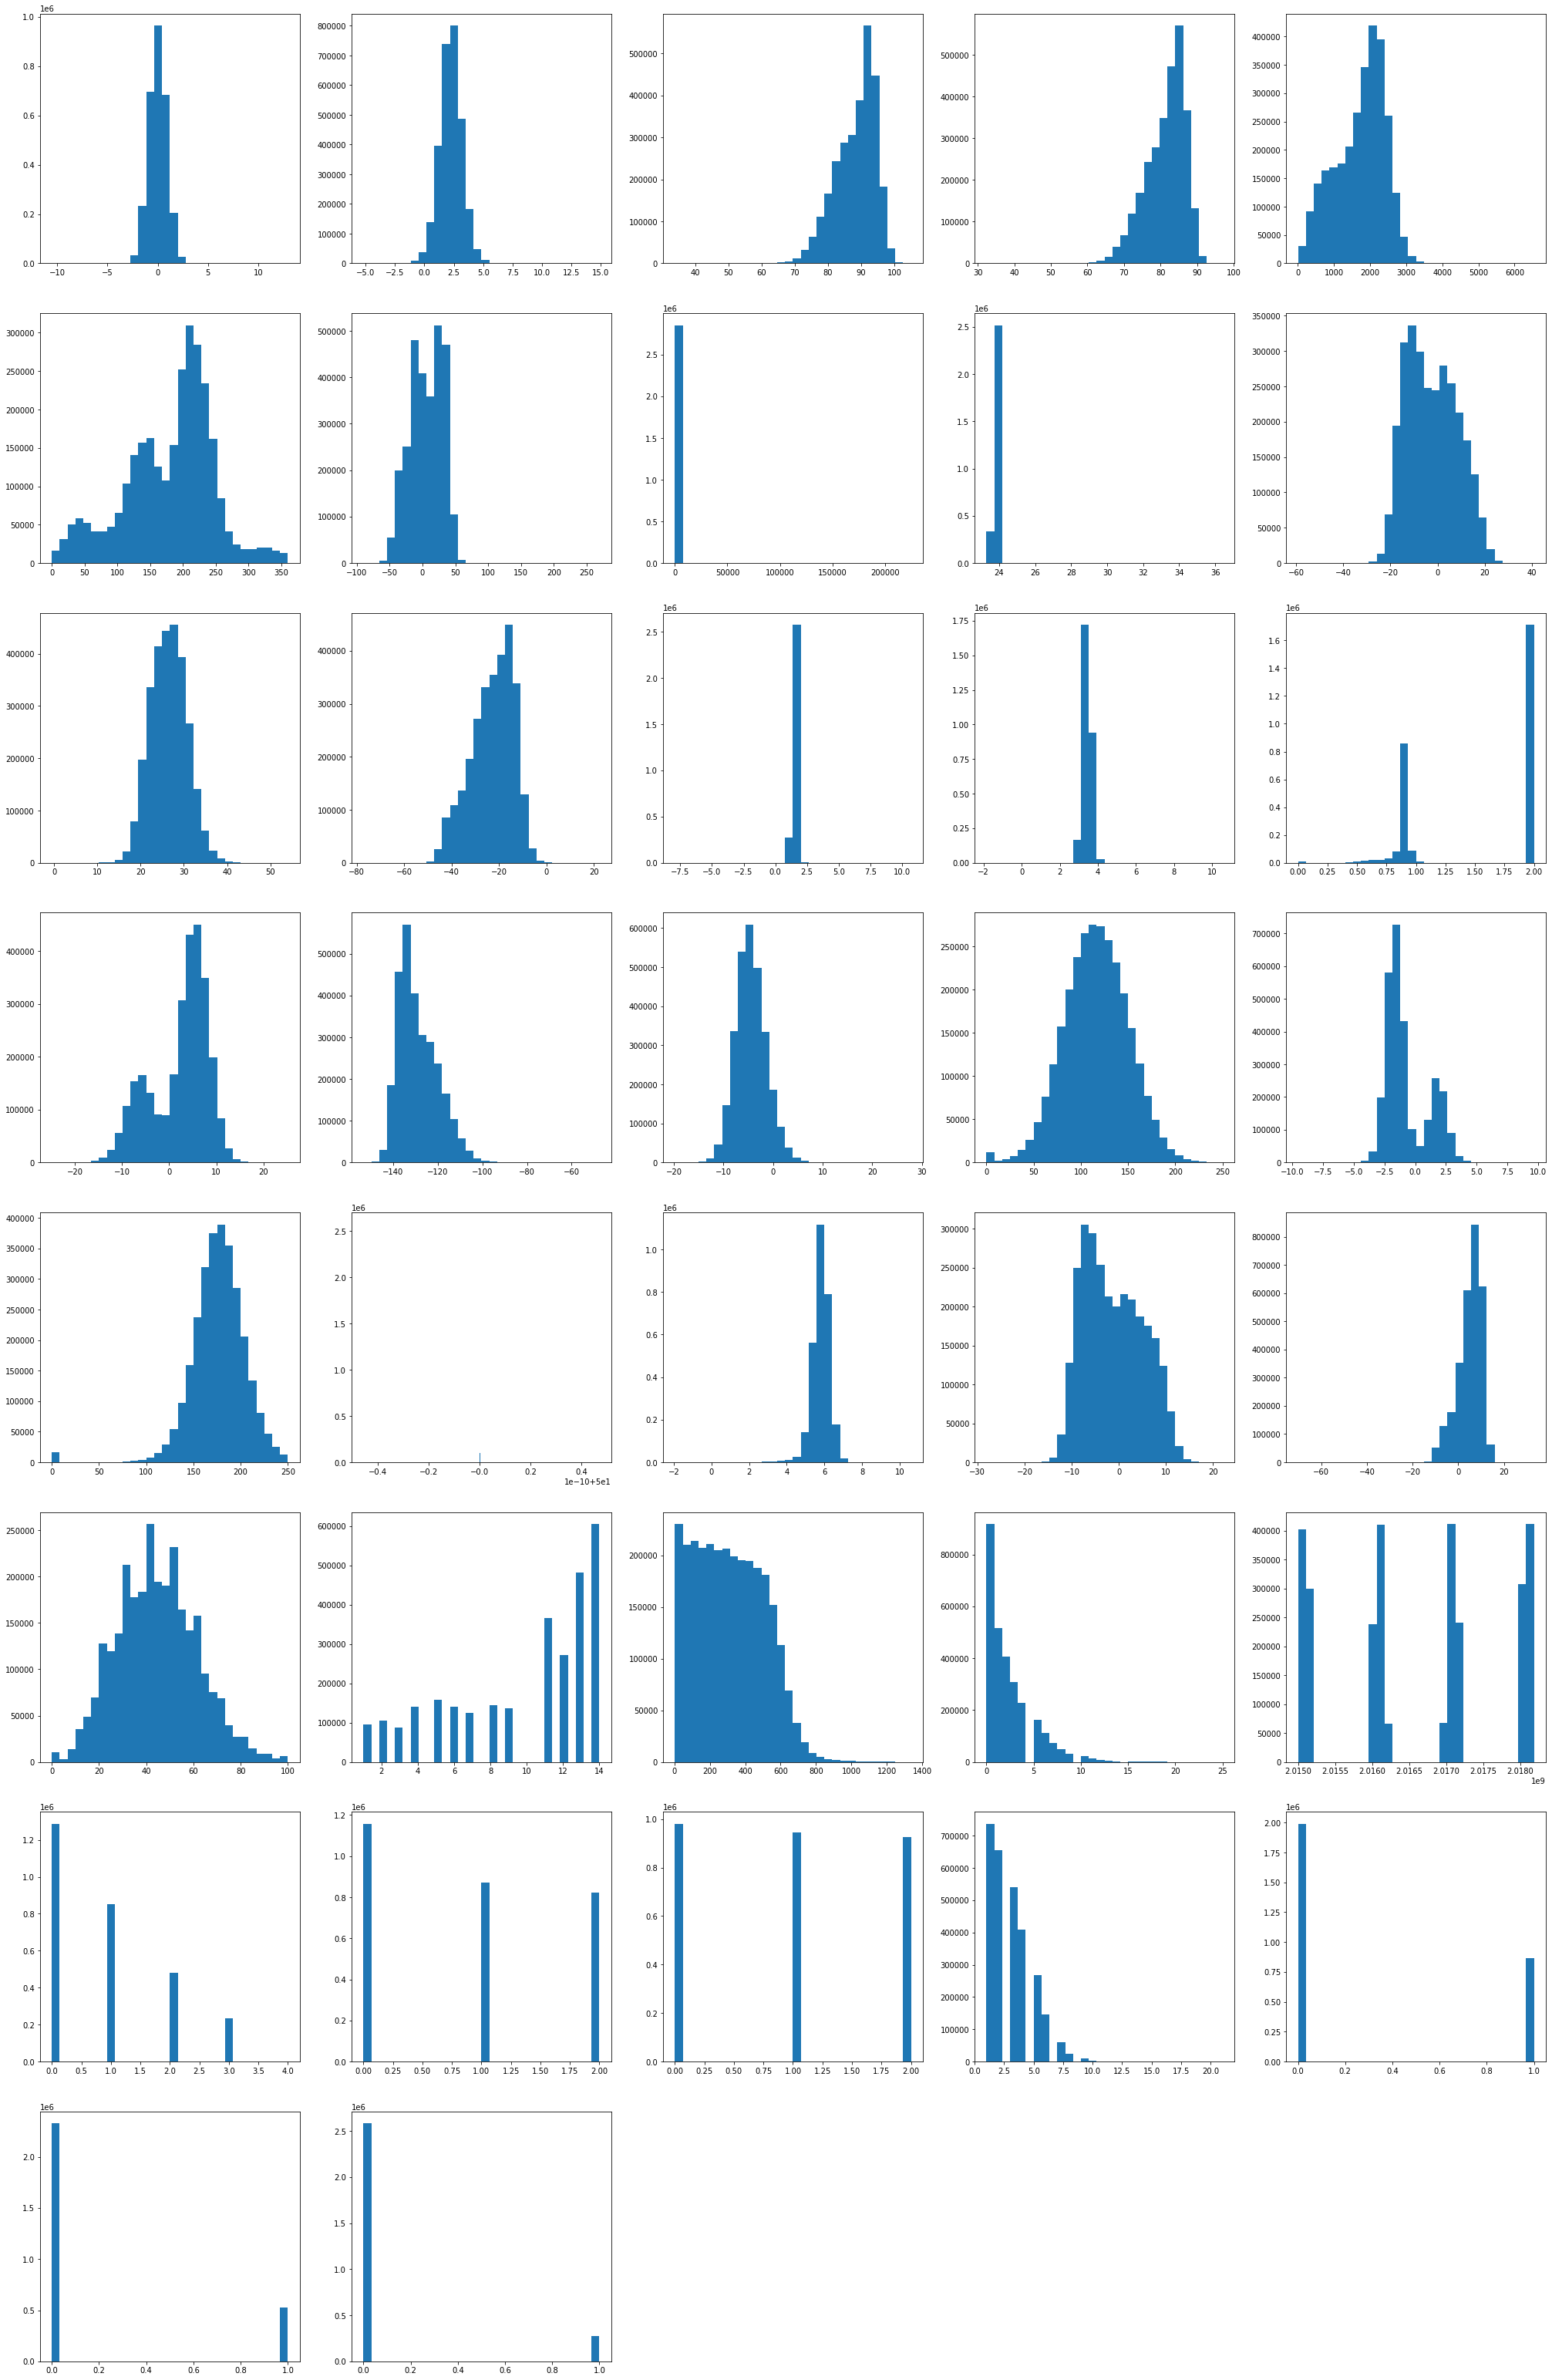

In [26]:
# 新数据集各个属性的直方图
fig, axs = plt.subplots(8, 5, figsize=(35, 56))
row = 0
col = 0
for label in df_numeric_nona1.columns: # 为每个属性绘制直方图
    axs[row, col].hist(df_numeric_nona1[label], bins=30)
    col += 1
    if col == 5:
        col = 0
        row += 1
axs[7,4].remove()
axs[7,3].remove()
axs[7,2].remove()
plt.show()

### 方法二：用最高频率值来填补缺失值

In [27]:
# 使用最高频率值来填补缺失值
simpleImp = SimpleImputer(strategy="most_frequent") # 初始化sklearn的SimpleImputer对象
data_columns = df_numeric.columns
df_numeric_nona2 = pd.DataFrame(simpleImp.fit_transform(df_numeric)) # 用最高频率值来填补缺失值
df_numeric_nona2.columns = data_columns

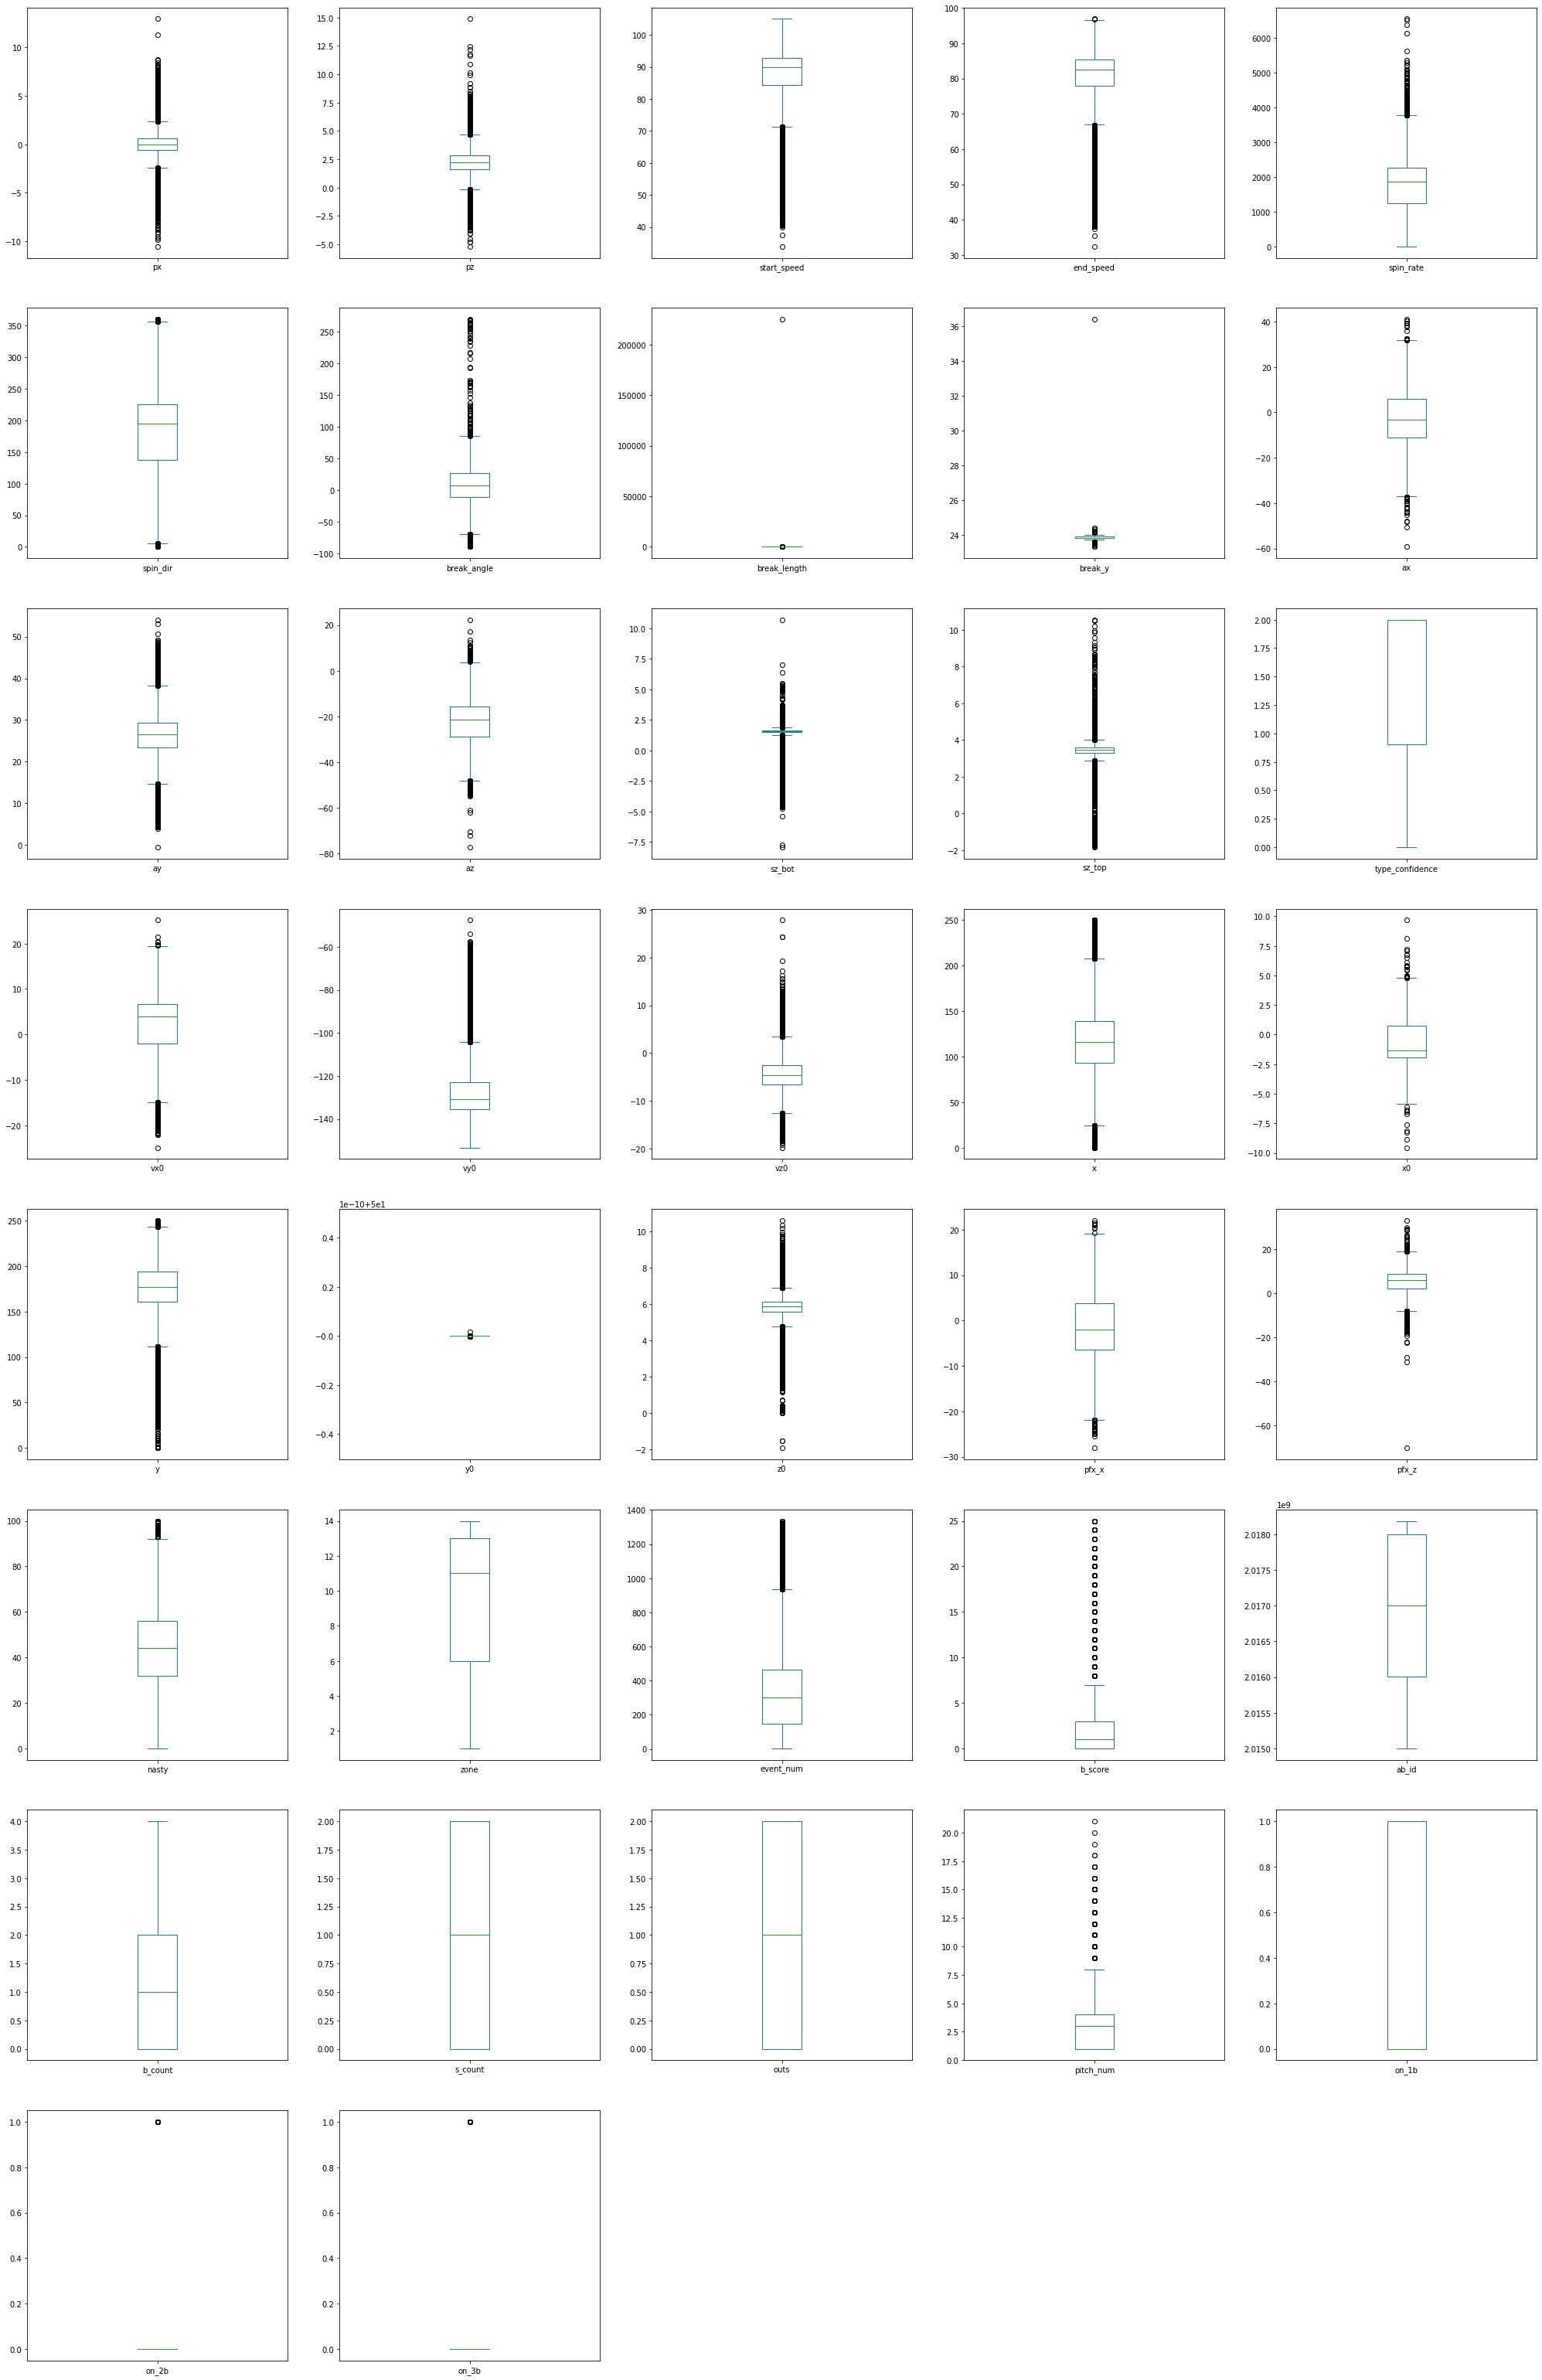

In [28]:
# 新数据集各个属性的盒图
fig, axs = plt.subplots(8, 5, figsize=(35, 56))
row = 0
col = 0
for label in df_numeric_nona2.columns: # 为每个属性绘制盒图
    df_numeric_nona2.plot.box(column=label, ax=axs[row, col])
    col += 1
    if col == 5:
        col = 0
        row += 1
axs[7,4].remove()
axs[7,3].remove()
axs[7,2].remove()

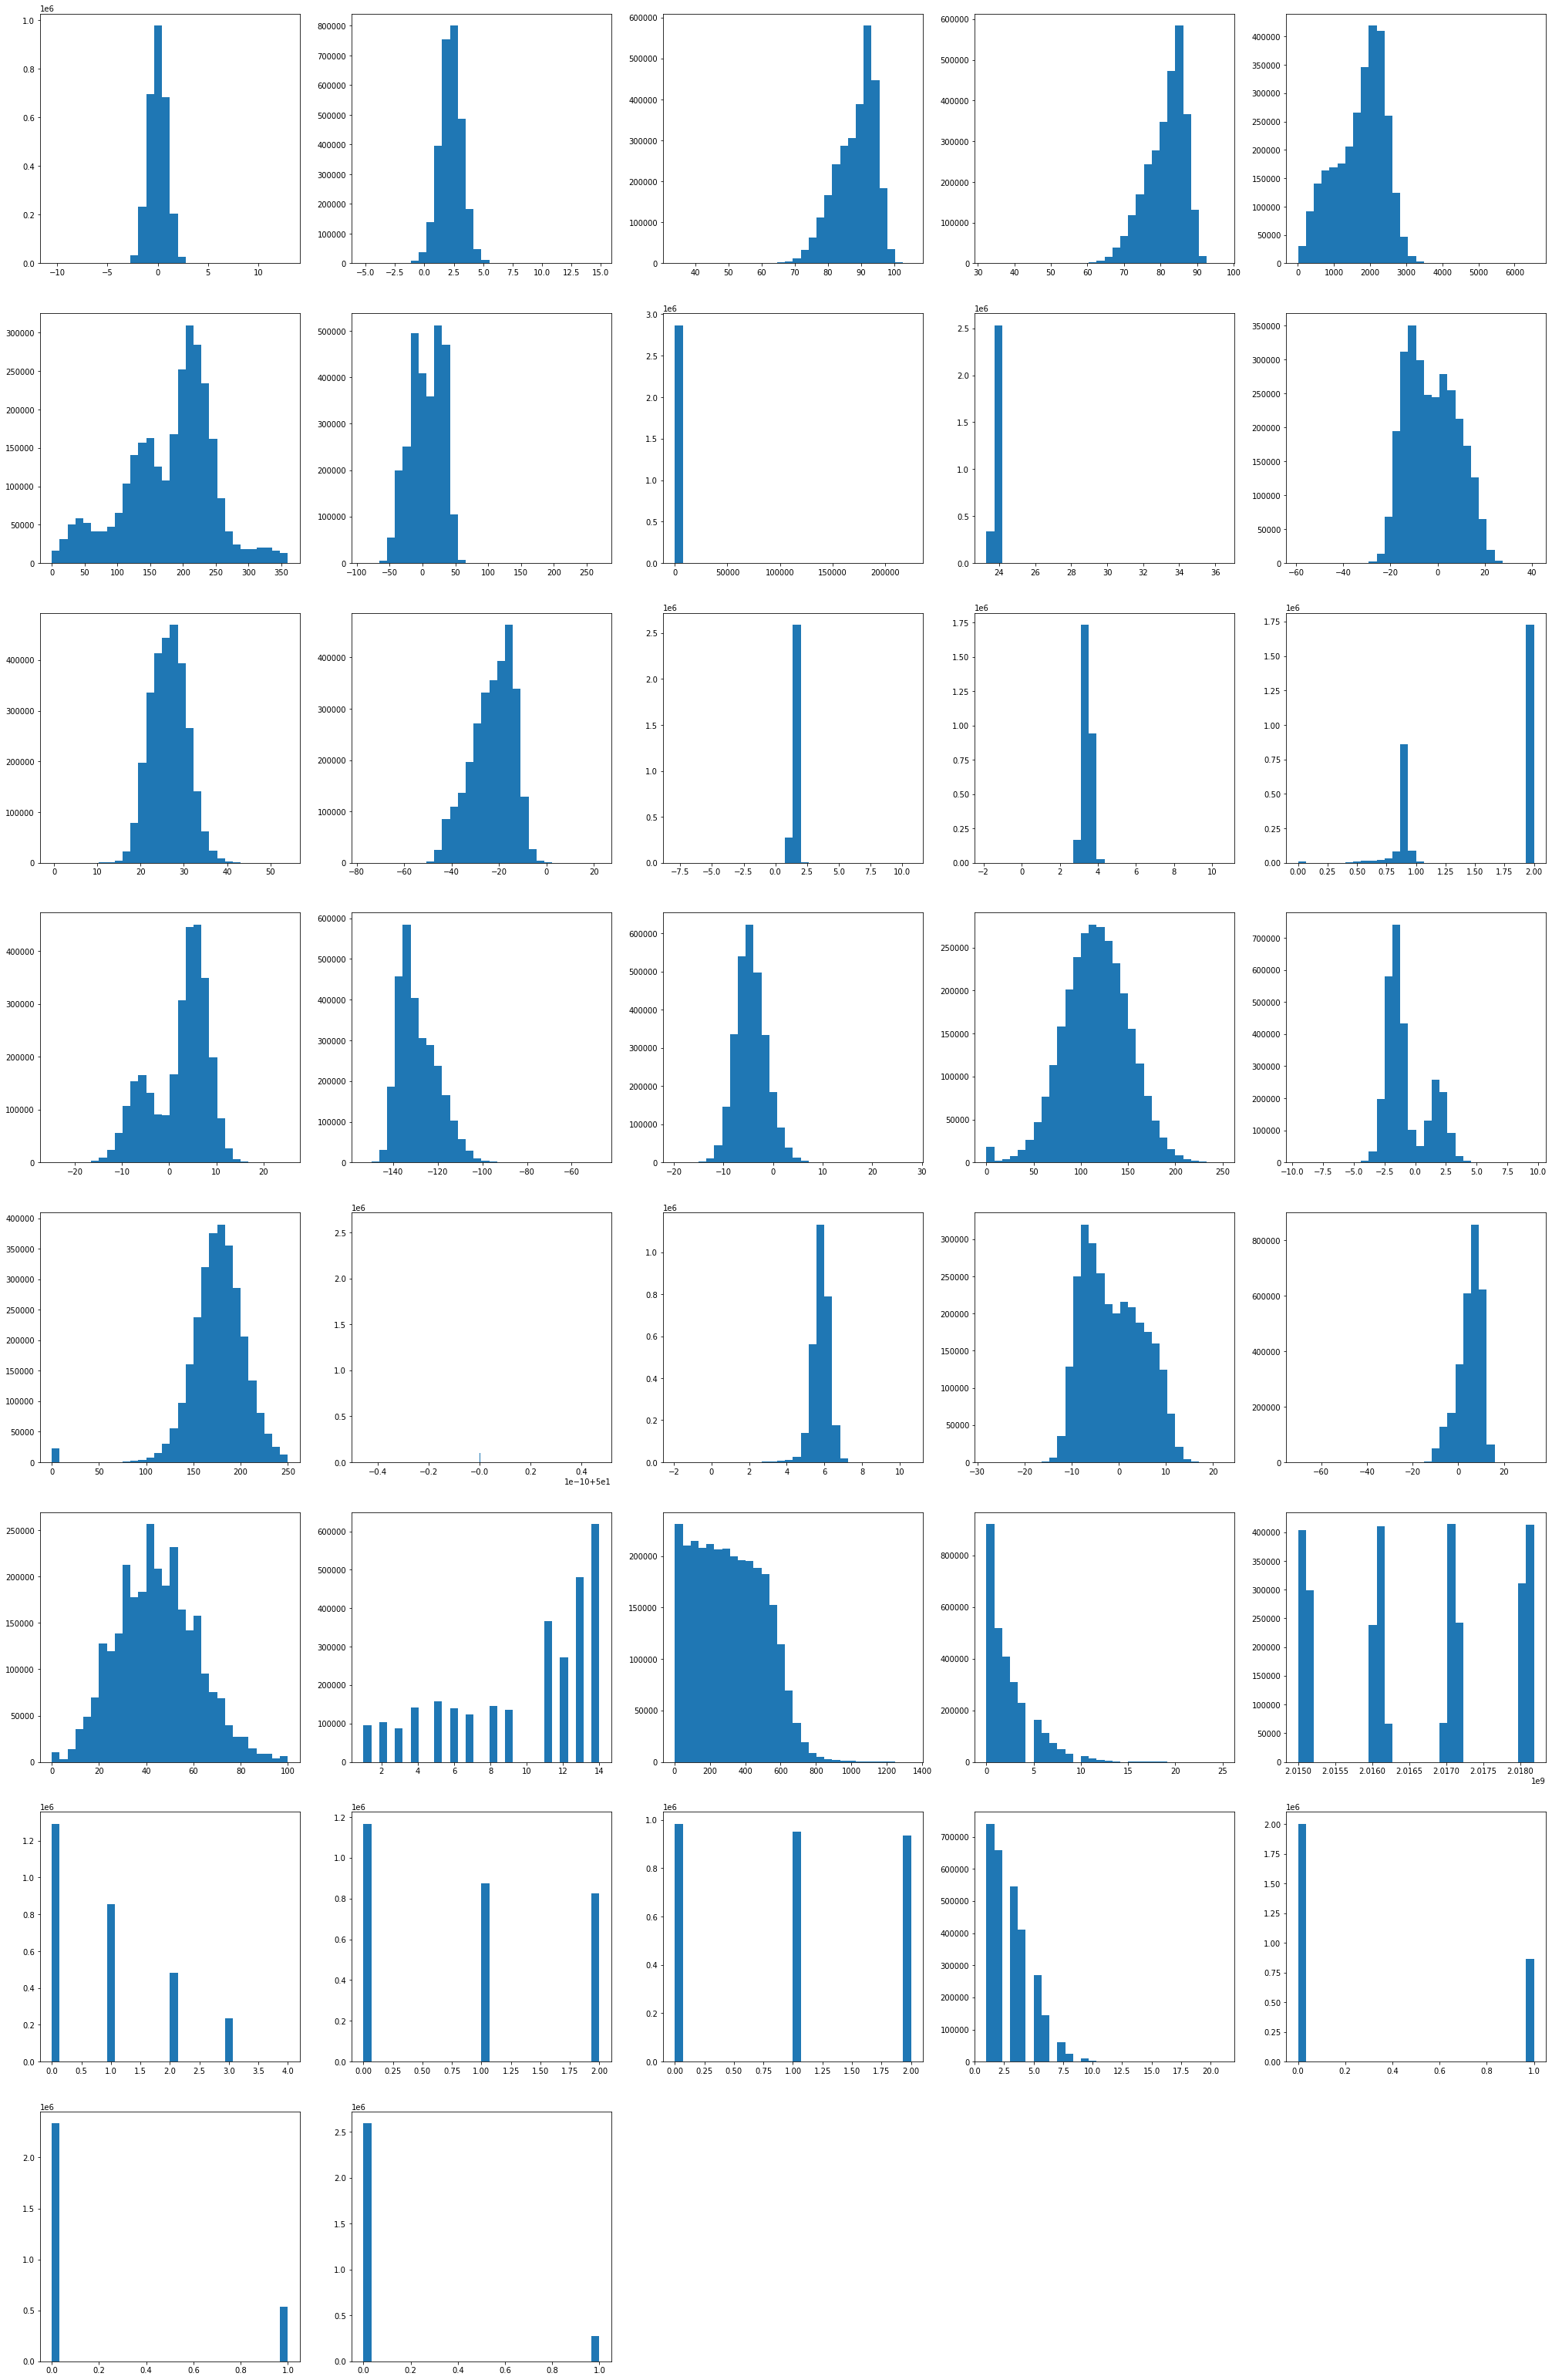

In [29]:
# 新数据集各个属性的直方图
fig, axs = plt.subplots(8, 5, figsize=(35, 56))
row = 0
col = 0
for label in df_numeric_nona2.columns: # 为每个属性绘制直方图
    axs[row, col].hist(df_numeric_nona2[label], bins=30)
    col += 1
    if col == 5:
        col = 0
        row += 1
axs[7,4].remove()
axs[7,3].remove()
axs[7,2].remove()
plt.show()

### 方法三：通过属性的相关关系来填补缺失值

In [30]:
# 通过属性的相关关系来填补缺失值
df_numeric_nona3 = df_numeric.copy()
df_corr = df_numeric.corr(method='pearson') # 计算属性之间的相关性矩阵
means = df_numeric.mean(axis=0) # 计算各属性的平均值
for label1 in df_numeric.columns:
    max_corr = 0
    relate_column = label1
    for label2 in df_numeric.columns: # 找到与label1相关性最高的属性
        if label1 == label2:
            continue
        else:
            if df_corr.at[label1, label2] > max_corr:
                max_corr = df_corr.at[label1, label2]
                relate_column = label2
    if relate_column != label1: # 填补缺失值
        rate = means.at[label1]/means.at[relate_column]
        df_numeric_nona3[label1].fillna(df_numeric[relate_column].mul(rate), inplace=True)

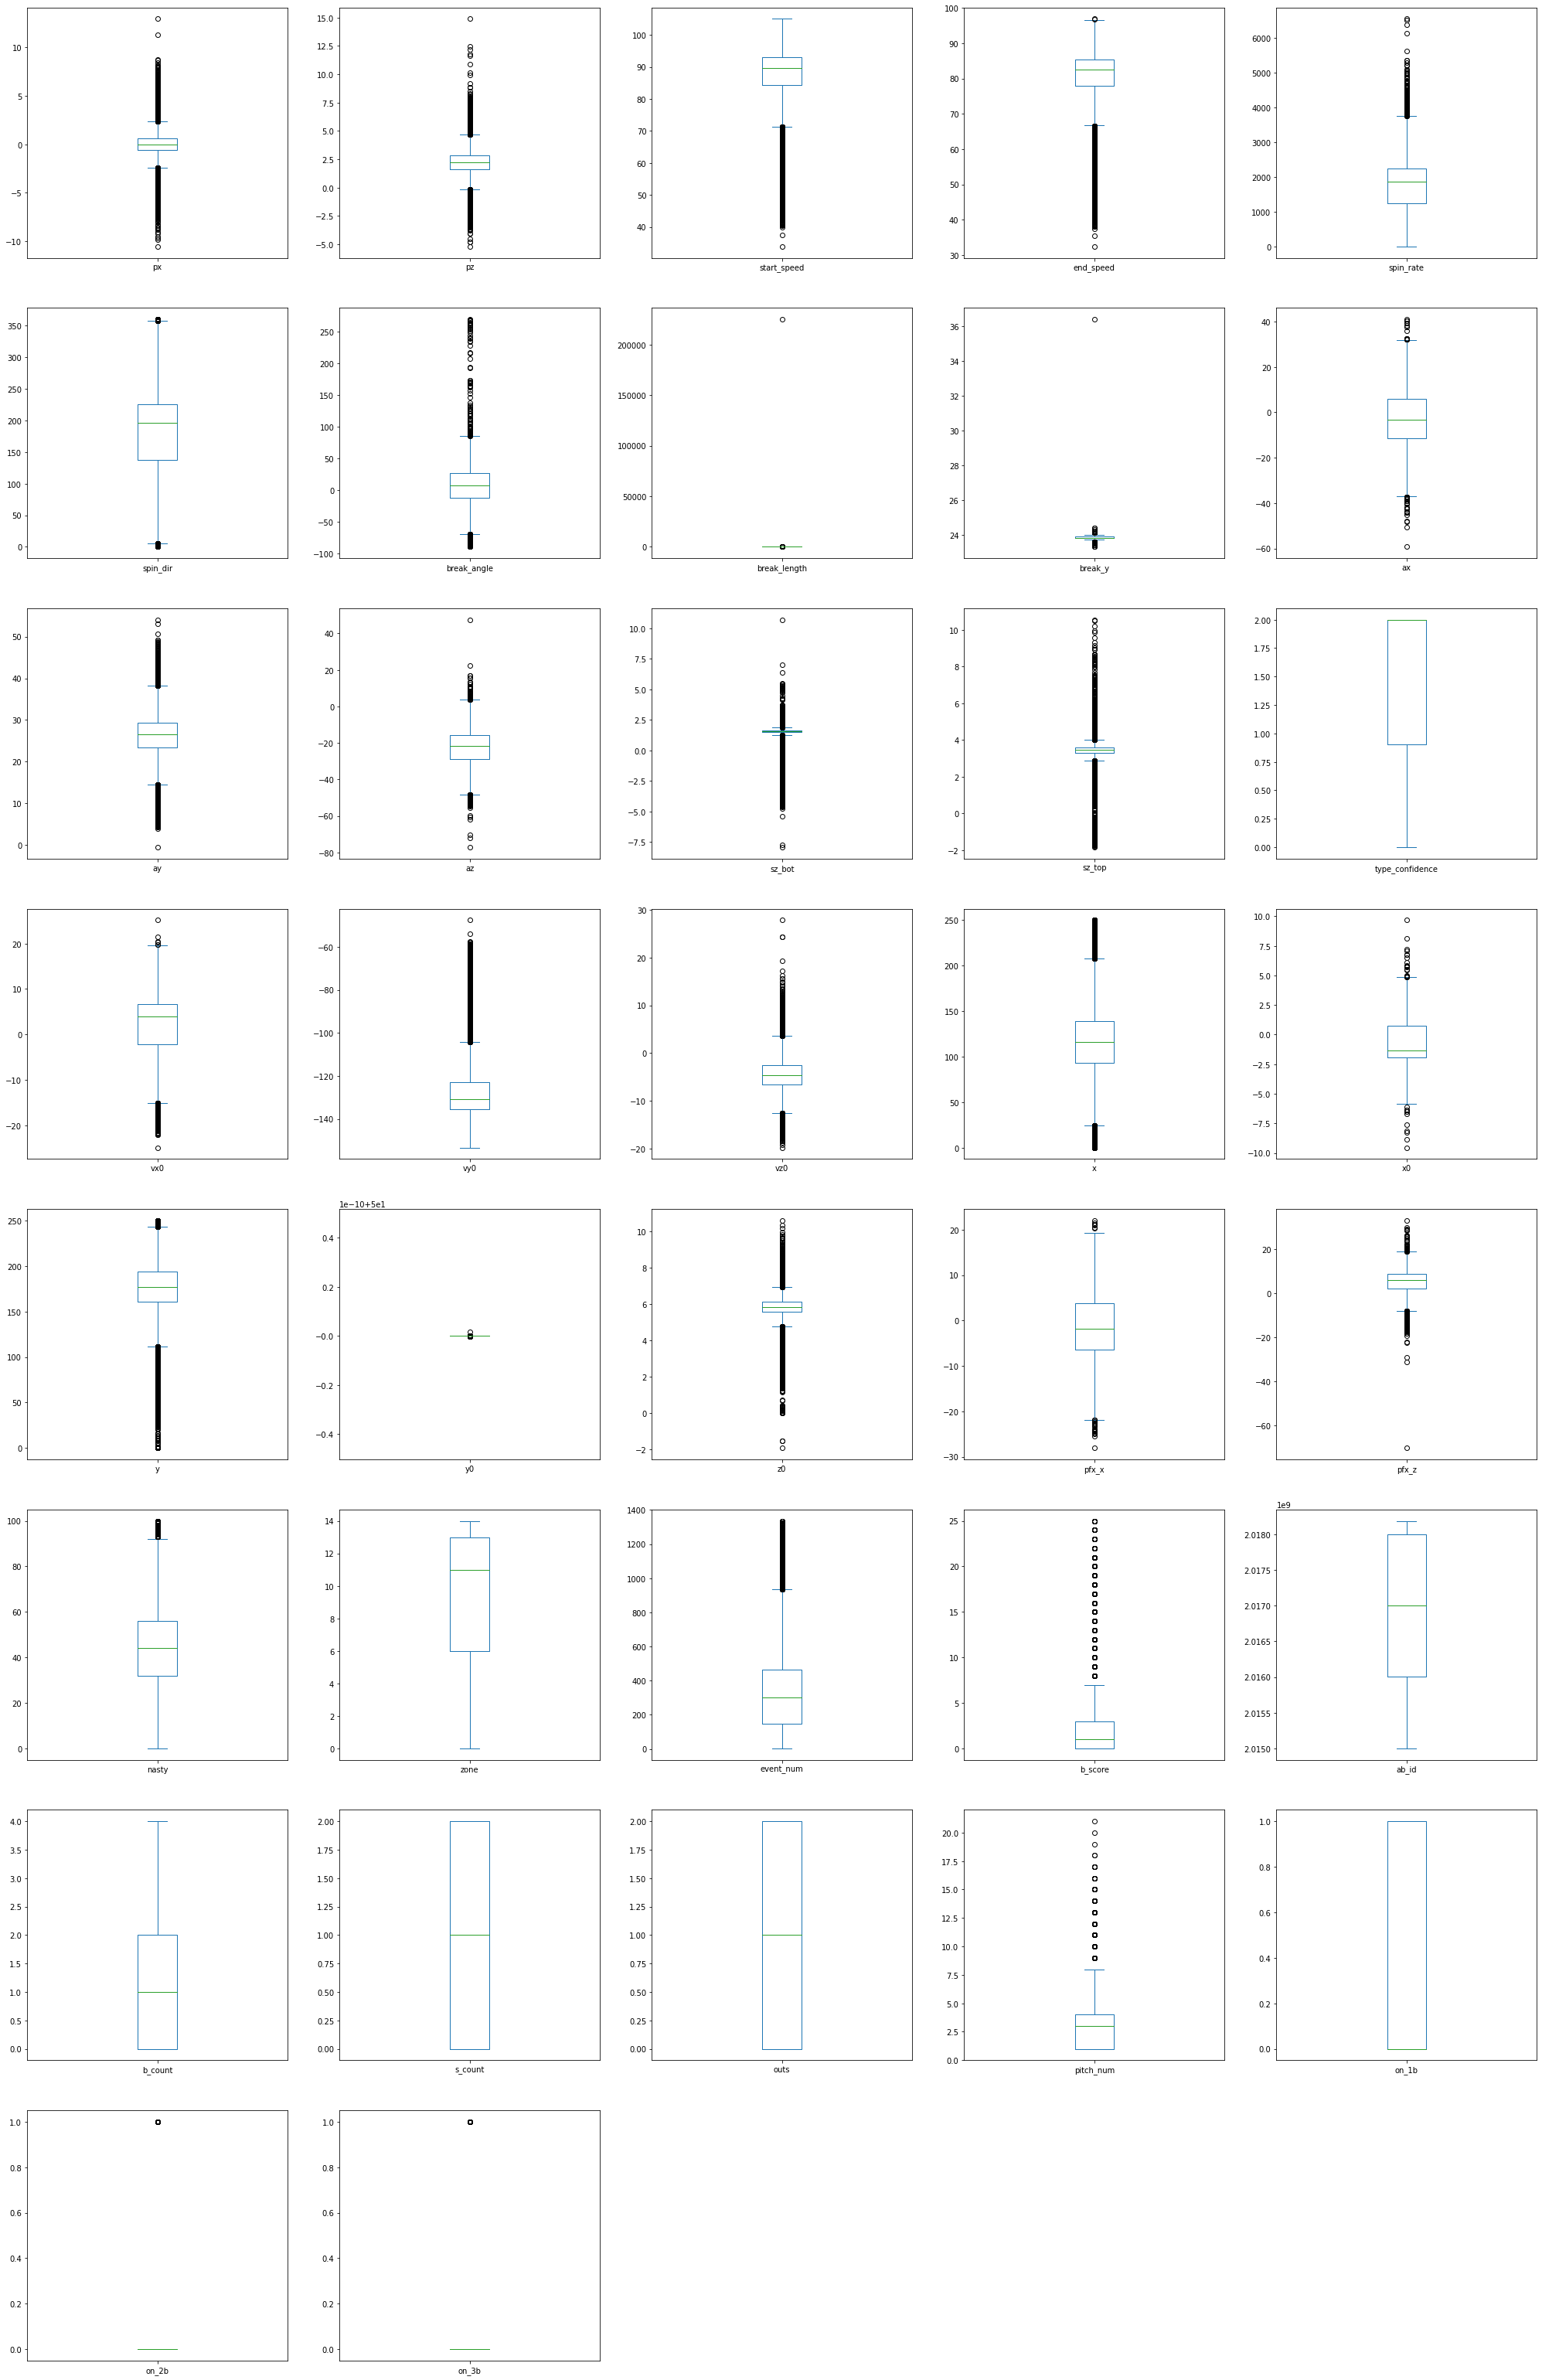

In [31]:
# 新数据集各个属性的盒图
fig, axs = plt.subplots(8, 5, figsize=(35, 56))
row = 0
col = 0
for label in df_numeric_nona3.columns: # 为每个属性绘制盒图
    df_numeric_nona3.plot.box(column=label, ax=axs[row, col])
    col += 1
    if col == 5:
        col = 0
        row += 1
axs[7,4].remove()
axs[7,3].remove()
axs[7,2].remove()

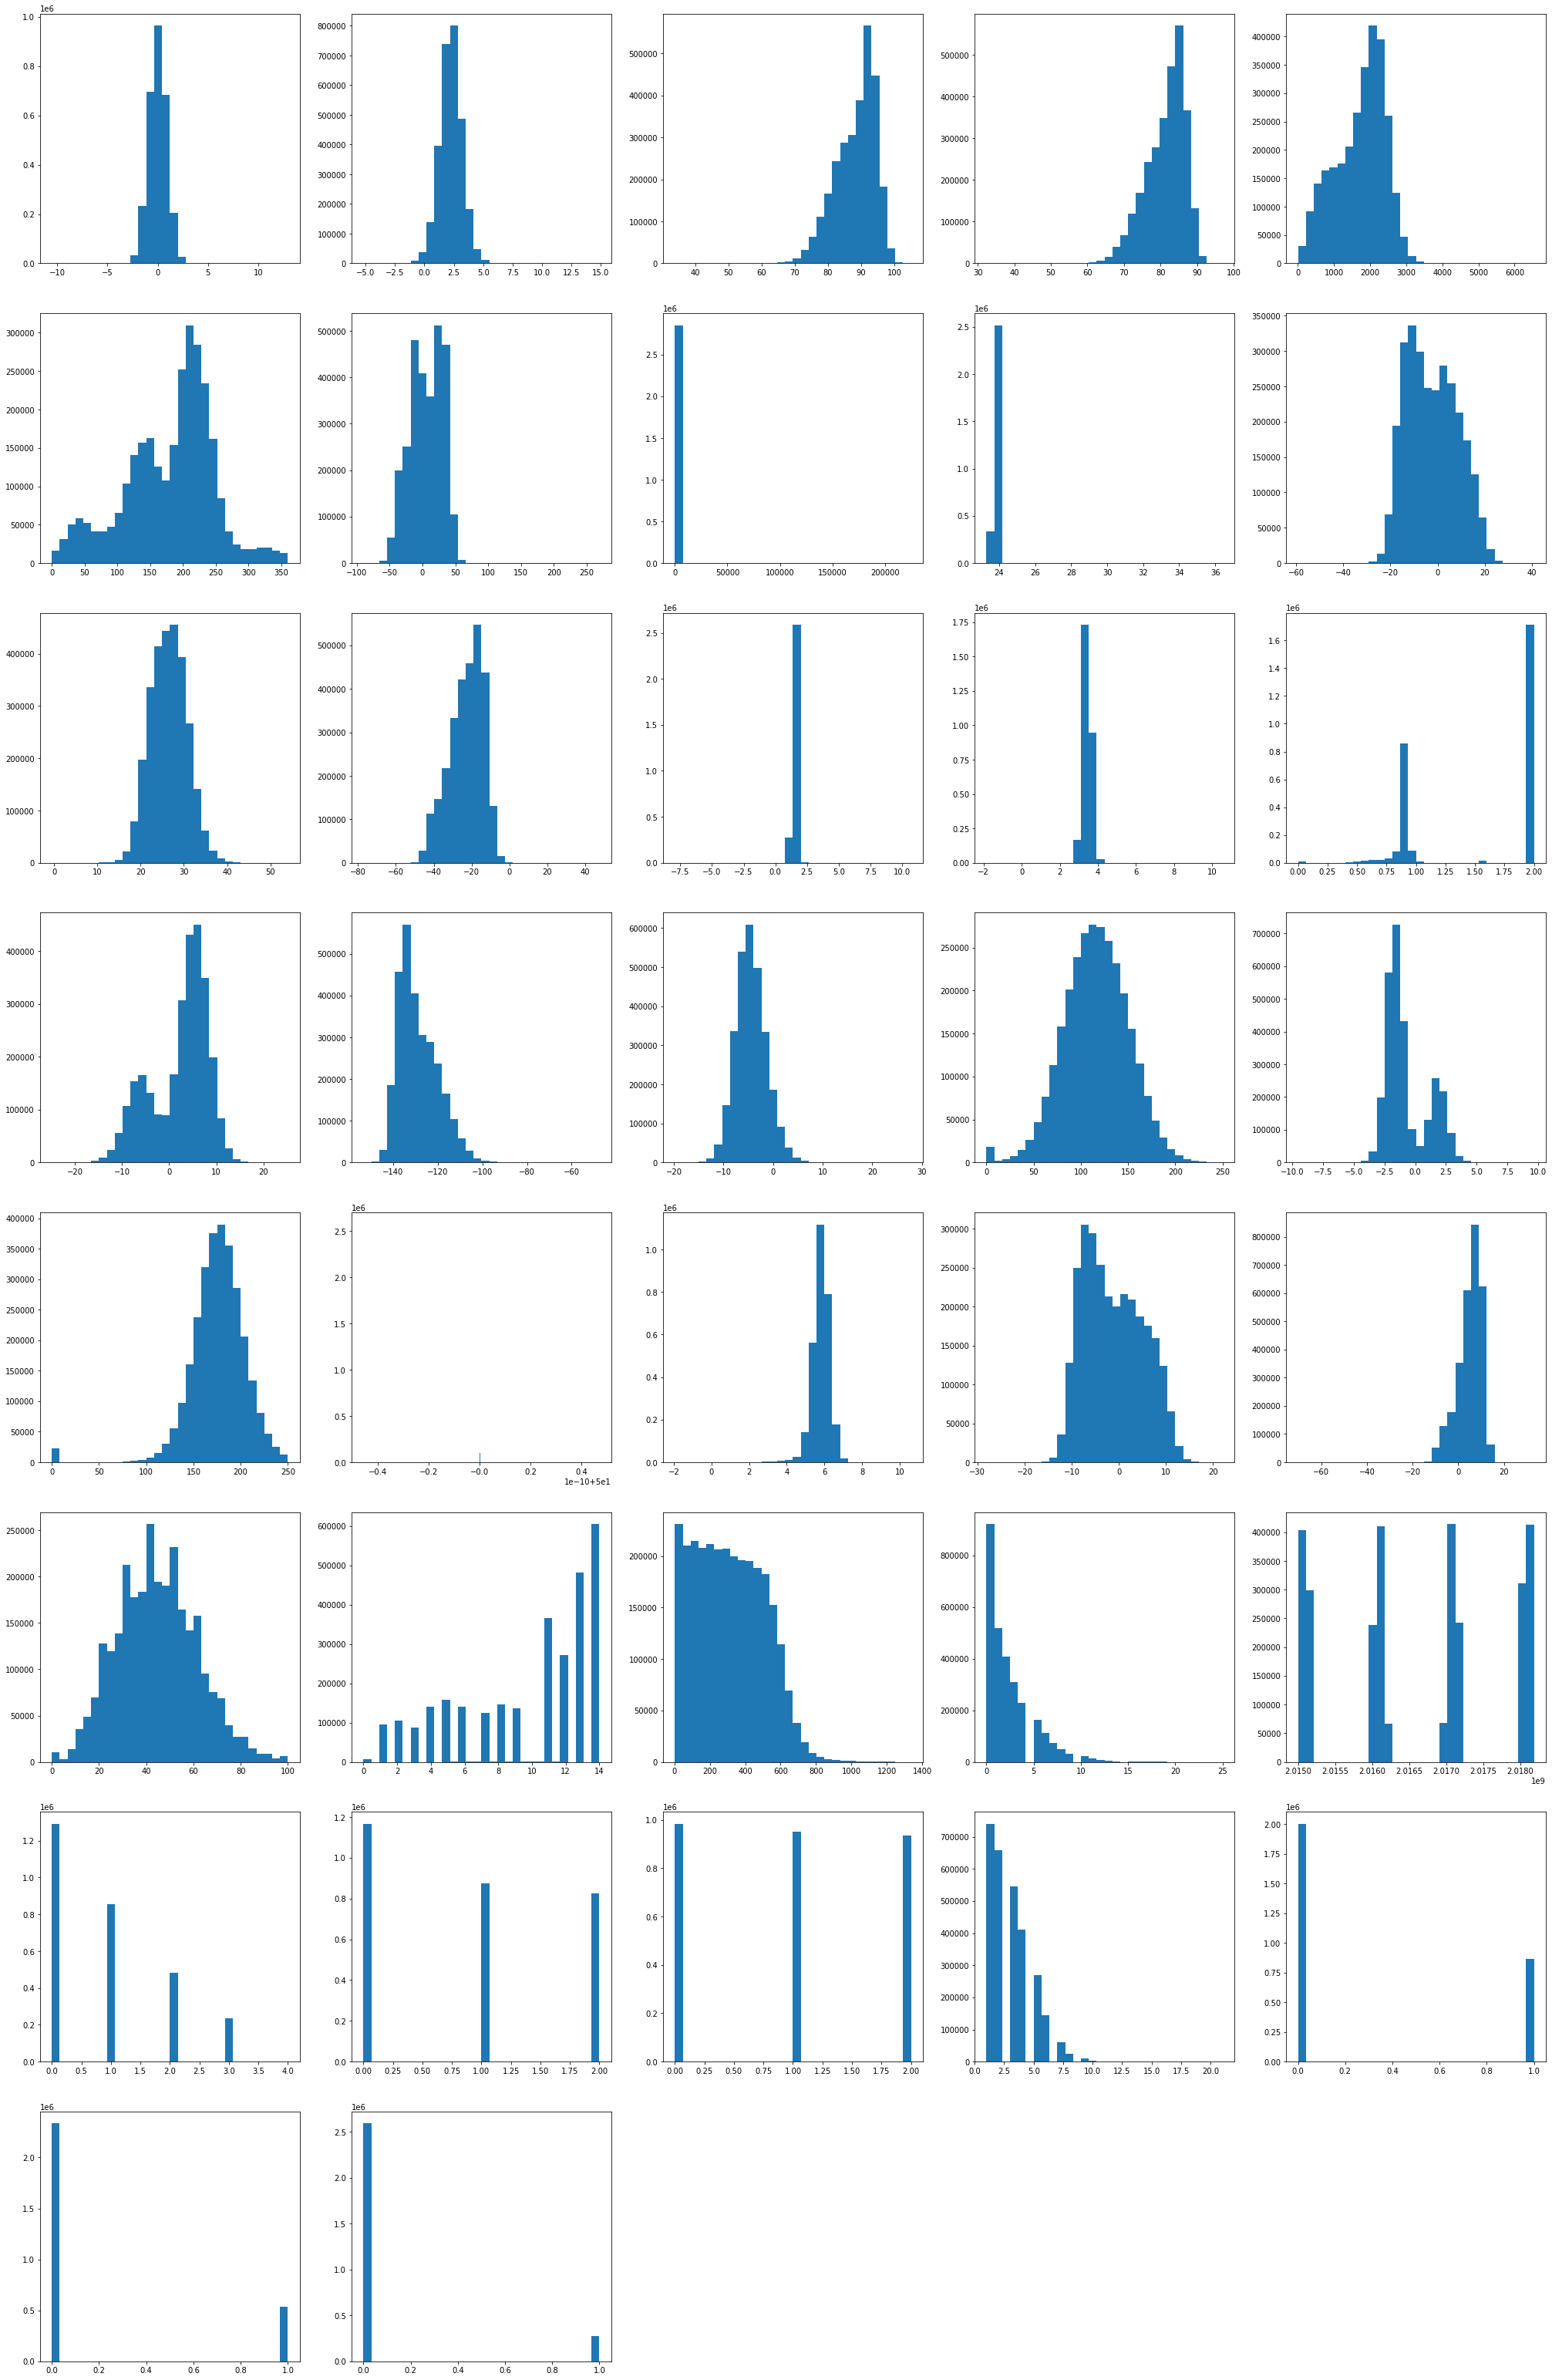

In [32]:
# 新数据集各个属性的直方图
fig, axs = plt.subplots(8, 5, figsize=(35, 56))
row = 0
col = 0
for label in df_numeric_nona3.columns: # 为每个属性绘制直方图
    axs[row, col].hist(df_numeric_nona3[label], bins=30)
    col += 1
    if col == 5:
        col = 0
        row += 1
axs[7,4].remove()
axs[7,3].remove()
axs[7,2].remove()
plt.show()